# EV Titans Clash: Tesla vs BYD vs Toyota Stock Analysis
## A Comprehensive Investment Analysis for the Electric Vehicle Revolution

**Kaggle Completion: Advanced Stock Market Analysis with Machine Learning**

### Executive Summary for Investors

This analysis deeply compares three automotive giants—Tesla, BYD, and Toyota—across price trends, volatility, growth rates, and risk profiles. Using 6+ years of historical stock data, we identify which company best suits conservative investors, growth seekers, and high-risk traders. Our machine learning model predicts Tesla's next 30 days, providing actionable insights for EV-focused portfolios. Discover market positioning, global expansion potential, and the future of electric mobility.


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"c:\Users\0300-7862011\Downloads\auto_company_comparison.csv")
print(df.head())

        Price               Close             Close.1             Close.2  \
0      Ticker               BYDDF                  TM                TSLA   
1        Date                 NaN                 NaN                 NaN   
2  2018-01-02    2.85831356048584  104.69963073730469  21.368667602539062   
3  2018-01-03  2.9577603340148926   106.1351089477539  21.149999618530273   
4  2018-01-04   2.912849187850952   107.7907943725586  20.974666595458984   

                 High              High.1              High.2  \
0               BYDDF                  TM                TSLA   
1                 NaN                 NaN                 NaN   
2  2.8871853868196915  104.74856524278762  21.474000930786133   
3  2.9577603340148926  106.22482635592965  21.683332443237305   
4  2.9705928305372975   107.7907943725586   21.23666763305664   

                  Low               Low.1               Low.2  \
0               BYDDF                  TM                TSLA   
1               

In [2]:
# First, let's understand the exact structure of the CSV
print("CSV Structure Analysis:")
print(f"Shape: {df.shape}")
print(f"\nFirst 3 rows and columns:")
print(df.iloc[:3, :8])
print(f"\nAll column names:")
for i, col in enumerate(df.columns):
    print(f"  Col {i}: '{col}'")

CSV Structure Analysis:
Shape: (2037, 16)

First 3 rows and columns:
        Price             Close             Close.1             Close.2  \
0      Ticker             BYDDF                  TM                TSLA   
1        Date               NaN                 NaN                 NaN   
2  2018-01-02  2.85831356048584  104.69963073730469  21.368667602539062   

                 High              High.1              High.2  \
0               BYDDF                  TM                TSLA   
1                 NaN                 NaN                 NaN   
2  2.8871853868196915  104.74856524278762  21.474000930786133   

                 Low  
0              BYDDF  
1                NaN  
2  2.839065676263272  

All column names:
  Col 0: 'Price'
  Col 1: 'Close'
  Col 2: 'Close.1'
  Col 3: 'Close.2'
  Col 4: 'High'
  Col 5: 'High.1'
  Col 6: 'High.2'
  Col 7: 'Low'
  Col 8: 'Low.1'
  Col 9: 'Low.2'
  Col 10: 'Open'
  Col 11: 'Open.1'
  Col 12: 'Open.2'
  Col 13: 'Volume'
  Col 14: '

## Data Cleaning & Structuring Phase

In [3]:
# 🔹 Step 1: Fix Multi-Level Headers & Structure Data
import warnings
warnings.filterwarnings('ignore')

# Reload data and fix headers
df_raw = pd.read_csv(r"c:\Users\0300-7862011\Downloads\auto_company_comparison.csv")

# Extract data starting from row 2 (row 0=tickers, row 1=NaN)
df = df_raw.iloc[2:].reset_index(drop=True).copy()

# Rename columns properly
# Structure: Col0=Date, Close(1-3), High(4-6), Low(7-9), Open(10-12), Volume(13-15)
tickers = ['BYDDF', 'TM', 'TSLA']
new_columns = ['Date']

# Add Close prices
new_columns.extend([f'{t}_Close' for t in tickers])
# Add High prices
new_columns.extend([f'{t}_High' for t in tickers])
# Add Low prices
new_columns.extend([f'{t}_Low' for t in tickers])
# Add Open prices
new_columns.extend([f'{t}_Open' for t in tickers])
# Add Volume
new_columns.extend([f'{t}_Volume' for t in tickers])

df.columns = new_columns

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert all price/volume columns to numeric
numeric_columns = [col for col in df.columns if col != 'Date']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove rows with NaN values
df_clean = df.dropna()

# Set Date as index
df_clean.set_index('Date', inplace=True)

# Extract close prices for each company
byd_close = df_clean['BYDDF_Close']
tm_close = df_clean['TM_Close']
tsla_close = df_clean['TSLA_Close']

# Keep a working copy for features
df = df_clean.copy()

print("✅ Data Cleaning Complete!")
print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📅 Date Range: {df.index.min()} to {df.index.max()}")
print(f"📊 Records: {len(df)} trading days")
print(f"\n📈 Column Names (Total: {len(df.columns)}):")
for i, col in enumerate(df.columns):
    print(f"   {i+1}. {col}")
print(f"\n🔍 First Few Rows:\n{df.head()}")
print(f"\n📉 Summary Statistics:\n{df[['BYDDF_Close', 'TM_Close', 'TSLA_Close']].describe()}")

✅ Data Cleaning Complete!

📊 Dataset Shape: (2035, 15)
📅 Date Range: 2018-01-02 00:00:00 to 2026-02-05 00:00:00
📊 Records: 2035 trading days

📈 Column Names (Total: 15):
   1. BYDDF_Close
   2. TM_Close
   3. TSLA_Close
   4. BYDDF_High
   5. TM_High
   6. TSLA_High
   7. BYDDF_Low
   8. TM_Low
   9. TSLA_Low
   10. BYDDF_Open
   11. TM_Open
   12. TSLA_Open
   13. BYDDF_Volume
   14. TM_Volume
   15. TSLA_Volume

🔍 First Few Rows:
            BYDDF_Close    TM_Close  TSLA_Close  BYDDF_High     TM_High  \
Date                                                                      
2018-01-02     2.858314  104.699631   21.368668    2.887185  104.748565   
2018-01-03     2.957760  106.135109   21.150000    2.957760  106.224826   
2018-01-04     2.912849  107.790794   20.974667    2.970593  107.790794   
2018-01-05     2.890393  109.177322   21.105333    2.925681  109.185474   
2018-01-08     2.896809  109.919525   22.427334    2.912849  109.935828   

            TSLA_High  BYDDF_Low      

## 🔹 Exploratory Data Analysis (EDA)

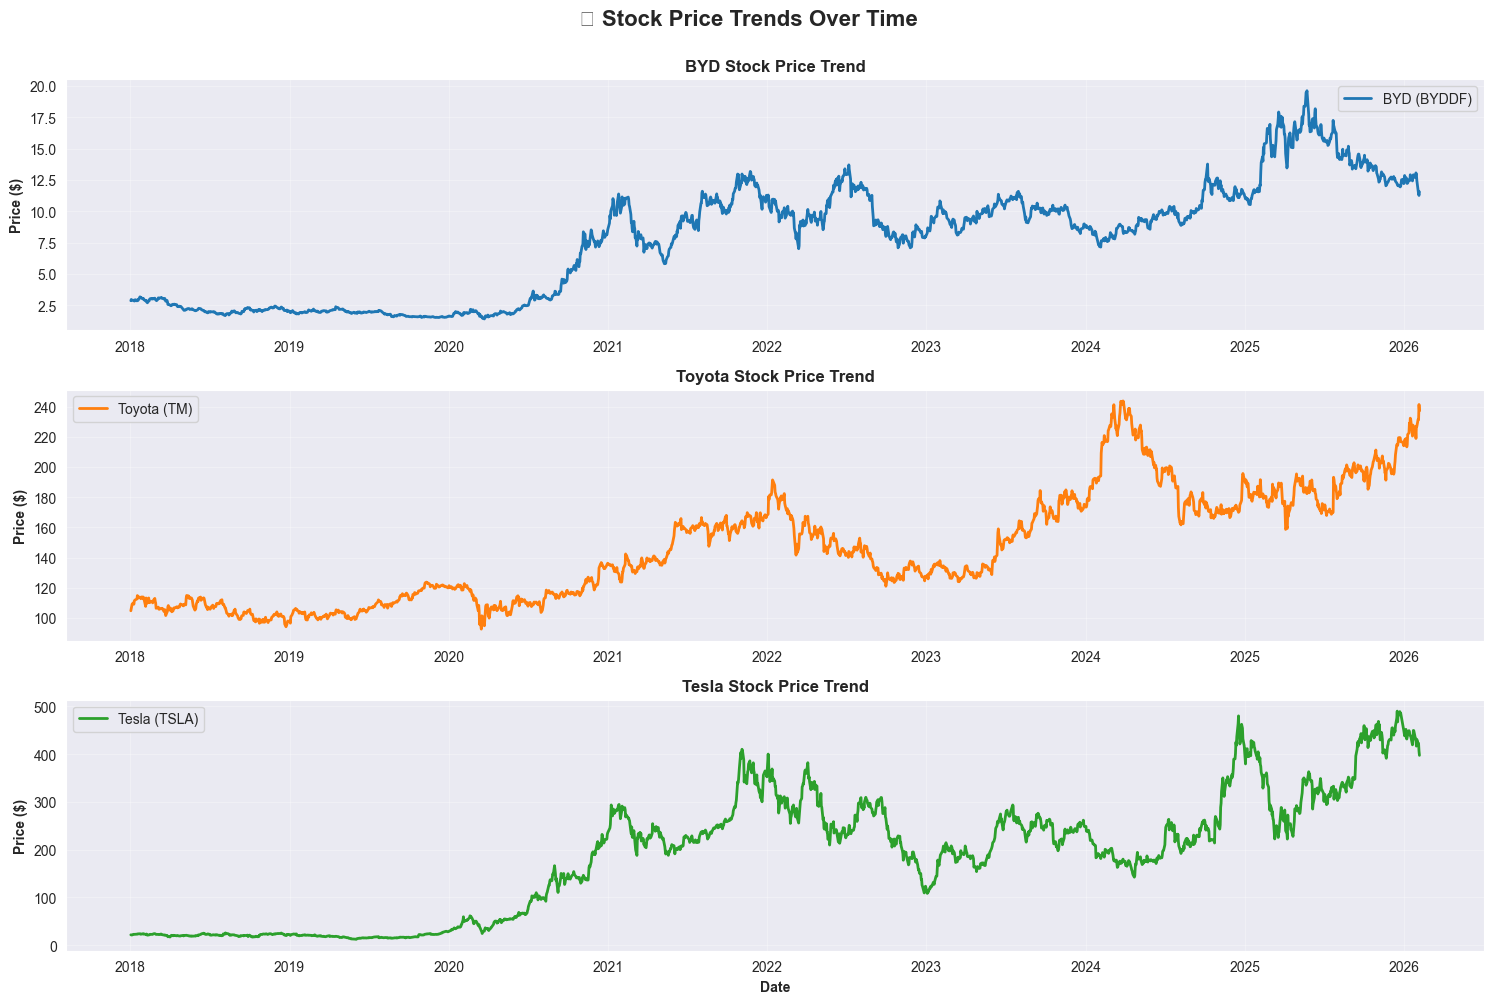

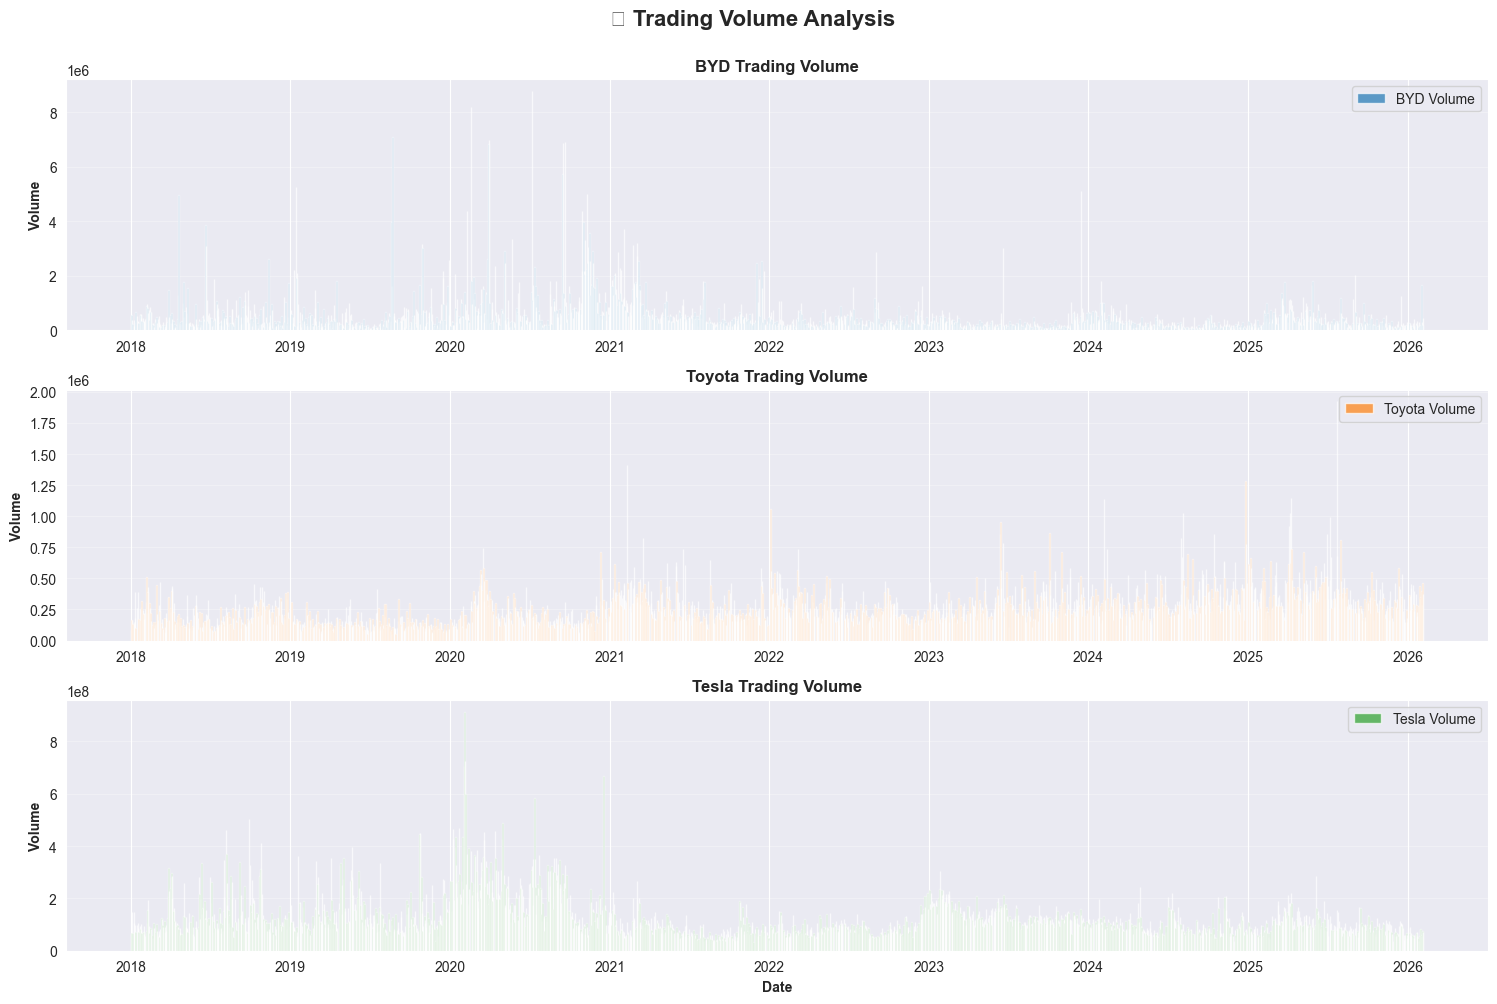


📉 VOLATILITY OVERVIEW (30-day Rolling Standard Deviation)


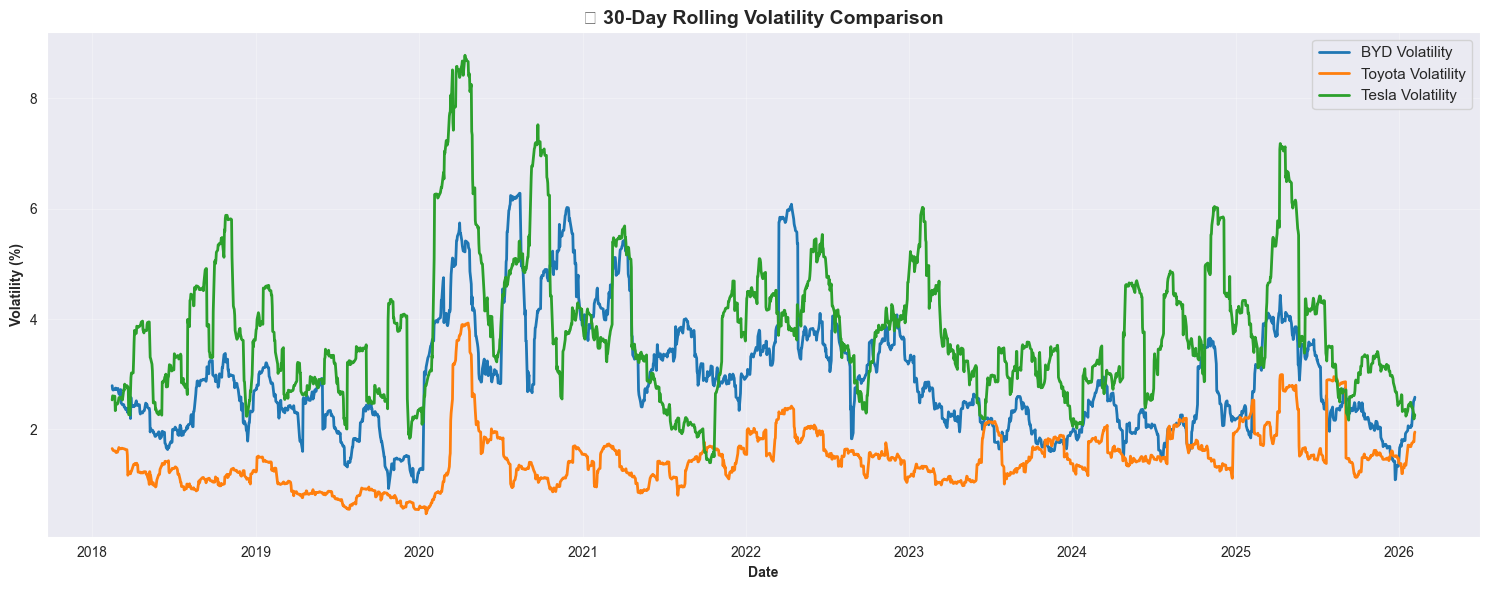


🔹 BYD - Average Volatility: 2.93%
🔹 Toyota - Average Volatility: 1.47%
🔹 Tesla - Average Volatility: 3.80%

🔗 CORRELATION BETWEEN STOCKS (Normalized Prices)
           BYDDF    Toyota      TSLA
BYDDF   1.000000  0.777070  0.895521
Toyota  0.777070  1.000000  0.777108
TSLA    0.895521  0.777108  1.000000


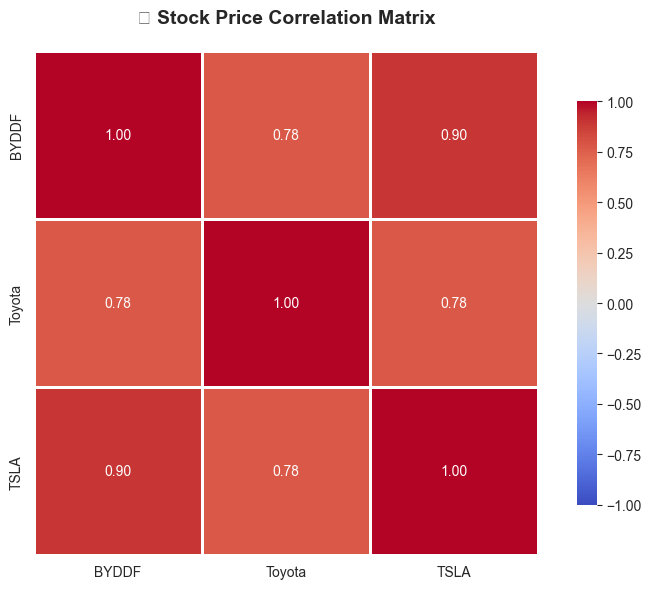

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for beautiful plots
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10

# 1️⃣ Price Trends Analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('📈 Stock Price Trends Over Time', fontsize=16, fontweight='bold', y=1.00)

axes[0].plot(df.index, byd_close, linewidth=2, color='#1f77b4', label='BYD (BYDDF)')
axes[0].set_ylabel('Price ($)', fontweight='bold')
axes[0].set_title('BYD Stock Price Trend', fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

axes[1].plot(df.index, tm_close, linewidth=2, color='#ff7f0e', label='Toyota (TM)')
axes[1].set_ylabel('Price ($)', fontweight='bold')
axes[1].set_title('Toyota Stock Price Trend', fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

axes[2].plot(df.index, tsla_close, linewidth=2, color='#2ca02c', label='Tesla (TSLA)')
axes[2].set_ylabel('Price ($)', fontweight='bold')
axes[2].set_xlabel('Date', fontweight='bold')
axes[2].set_title('Tesla Stock Price Trend', fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2️⃣ Volume Behavior Analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
fig.suptitle('📊 Trading Volume Analysis', fontsize=16, fontweight='bold', y=1.00)

axes[0].bar(df.index, df['BYDDF_Volume'], color='#1f77b4', alpha=0.7, label='BYD Volume')
axes[0].set_ylabel('Volume', fontweight='bold')
axes[0].set_title('BYD Trading Volume', fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(df.index, df['TM_Volume'], color='#ff7f0e', alpha=0.7, label='Toyota Volume')
axes[1].set_ylabel('Volume', fontweight='bold')
axes[1].set_title('Toyota Trading Volume', fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3, axis='y')

axes[2].bar(df.index, df['TSLA_Volume'], color='#2ca02c', alpha=0.7, label='Tesla Volume')
axes[2].set_ylabel('Volume', fontweight='bold')
axes[2].set_xlabel('Date', fontweight='bold')
axes[2].set_title('Tesla Trading Volume', fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3️⃣ Volatility Analysis (30-day rolling volatility)
print("\n" + "="*70)
print("📉 VOLATILITY OVERVIEW (30-day Rolling Standard Deviation)")
print("="*70)

byd_volatility = df['BYDDF_Close'].pct_change().rolling(window=30).std() * 100
tm_volatility = df['TM_Close'].pct_change().rolling(window=30).std() * 100
tsla_volatility = df['TSLA_Close'].pct_change().rolling(window=30).std() * 100

fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(df.index, byd_volatility, linewidth=2, label='BYD Volatility', color='#1f77b4')
ax.plot(df.index, tm_volatility, linewidth=2, label='Toyota Volatility', color='#ff7f0e')
ax.plot(df.index, tsla_volatility, linewidth=2, label='Tesla Volatility', color='#2ca02c')
ax.set_ylabel('Volatility (%)', fontweight='bold')
ax.set_xlabel('Date', fontweight='bold')
ax.set_title('📊 30-Day Rolling Volatility Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print volatility statistics
print(f"\n🔹 BYD - Average Volatility: {byd_volatility.mean():.2f}%")
print(f"🔹 Toyota - Average Volatility: {tm_volatility.mean():.2f}%")
print(f"🔹 Tesla - Average Volatility: {tsla_volatility.mean():.2f}%")

# 4️⃣ Correlation Analysis
correlation_df = pd.DataFrame({
    'BYDDF': byd_close.values,
    'Toyota': tm_close.values,
    'TSLA': tsla_close.values
})

correlation_matrix = correlation_df.corr()

print("\n" + "="*70)
print("🔗 CORRELATION BETWEEN STOCKS (Normalized Prices)")
print("="*70)
print(correlation_matrix)

# Correlation heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax, fmt='.2f',
            vmin=-1, vmax=1)
ax.set_title('🔗 Stock Price Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 🔹 Comparative Analysis: Tesla vs BYD vs Toyota


⚡ COMPREHENSIVE INVESTMENT METRICS COMPARISON
     Company Current Price Start Price Min Price Max Price Total Return (%) Annual Return (%) Volatility (%) Max Drawdown (%) Sharpe Ratio
 BYD (BYDDF)        $11.55       $2.86     $1.40    $19.62          304.08%            29.40%         49.48%          -55.71%         0.59
 Toyota (TM)       $237.19     $104.70    $92.54   $243.76          126.54%            13.17%         24.71%          -36.80%         0.53
Tesla (TSLA)       $397.21      $21.37    $11.93   $489.88         1758.84%            56.24%         63.44%          -73.63%         0.89


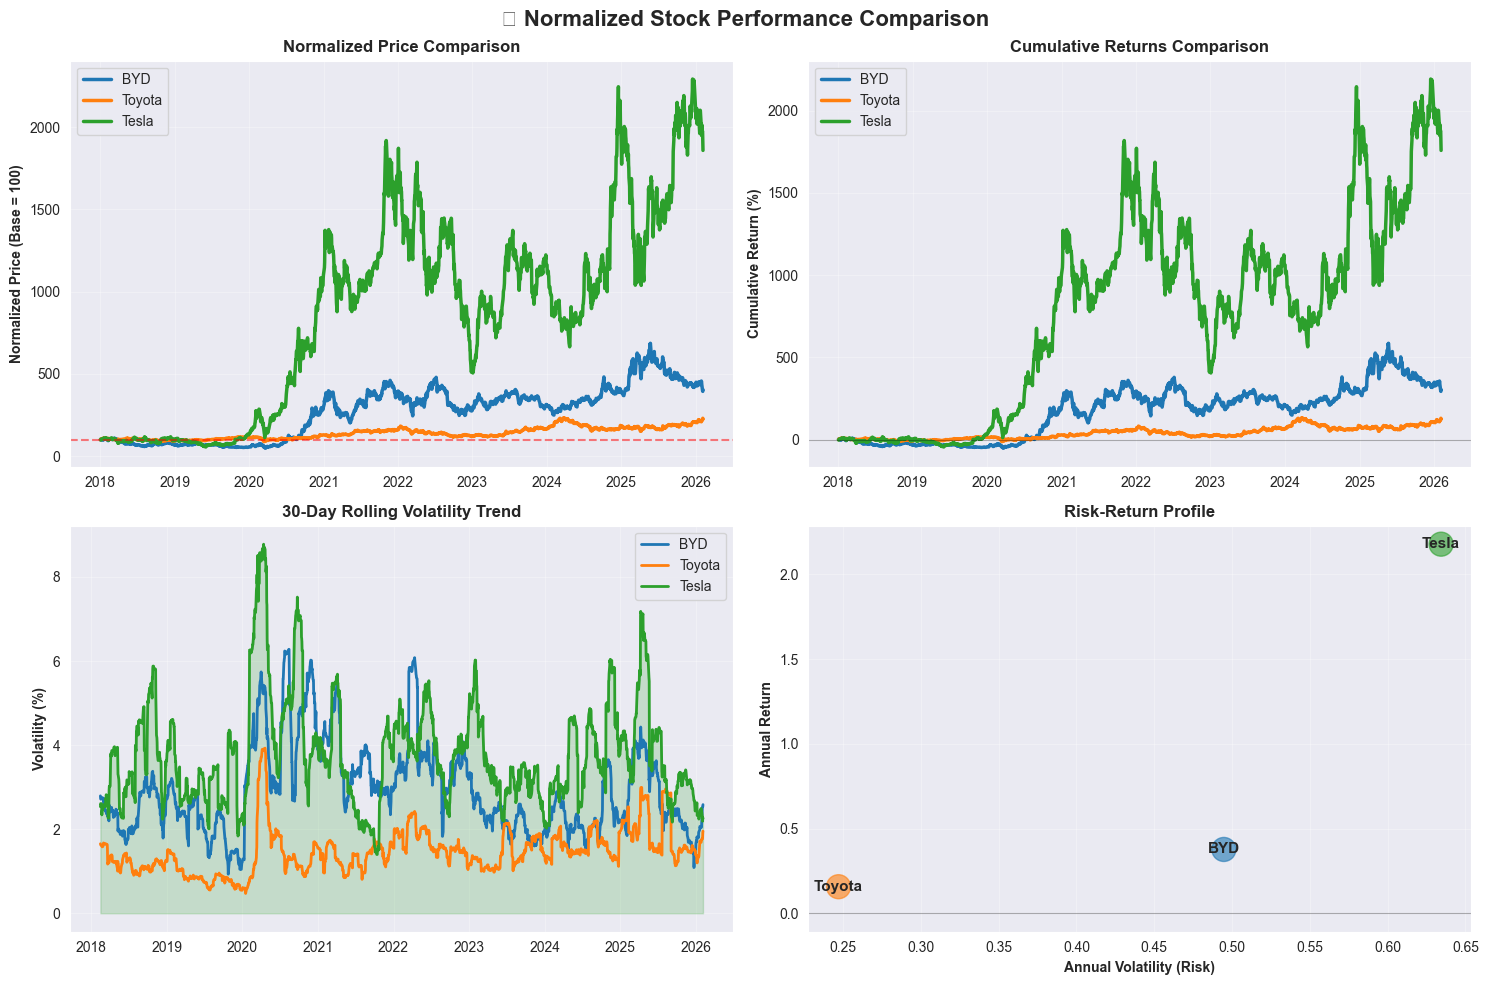


💡 KEY INSIGHTS:
✓ Most Stable: Toyota
✓ Most Volatile (High-Risk/High-Reward): Tesla
✓ Best Historical Returns: Tesla


In [5]:
# Calculate key metrics for comparison
def calculate_metrics(price_series, company_name):
    """Calculate investment metrics for a stock"""
    
    # Returns
    returns = price_series.pct_change()
    daily_return = returns.mean() * 100
    annual_return = daily_return * 252
    
    # Performance
    total_return = ((price_series.iloc[-1] / price_series.iloc[0]) - 1) * 100
    max_drawdown = ((price_series.cummax() - price_series) / price_series.cummax()).max() * 100
    
    # Risk
    volatility = returns.std() * np.sqrt(252) * 100
    sharpe_ratio = (daily_return * 252) / (returns.std() * np.sqrt(252) * 100) if returns.std() != 0 else 0
    
    # Current stats
    current_price = price_series.iloc[-1]
    start_price = price_series.iloc[0]
    min_price = price_series.min()
    max_price = price_series.max()
    
    return {
        'Company': company_name,
        'Current Price': f"${current_price:.2f}",
        'Start Price': f"${start_price:.2f}",
        'Min Price': f"${min_price:.2f}",
        'Max Price': f"${max_price:.2f}",
        'Total Return (%)': f"{total_return:.2f}%",
        'Annual Return (%)': f"{annual_return:.2f}%",
        'Volatility (%)': f"{volatility:.2f}%",
        'Max Drawdown (%)': f"{-max_drawdown:.2f}%",
        'Sharpe Ratio': f"{sharpe_ratio:.2f}"
    }

# Calculate metrics
metrics_byd = calculate_metrics(byd_close, "BYD (BYDDF)")
metrics_tm = calculate_metrics(tm_close, "Toyota (TM)")
metrics_tsla = calculate_metrics(tsla_close, "Tesla (TSLA)")

# Create comparison table
metrics_df = pd.DataFrame([metrics_byd, metrics_tm, metrics_tsla])

print("\n" + "="*100)
print("⚡ COMPREHENSIVE INVESTMENT METRICS COMPARISON")
print("="*100)
print(metrics_df.to_string(index=False))
print("="*100)

# Create normalized comparison chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🏆 Normalized Stock Performance Comparison', fontsize=16, fontweight='bold')

# Normalize prices to 100 for better comparison
byd_normalized = (byd_close / byd_close.iloc[0]) * 100
tm_normalized = (tm_close / tm_close.iloc[0]) * 100
tsla_normalized = (tsla_close / tsla_close.iloc[0]) * 100

axes[0, 0].plot(df.index, byd_normalized, label='BYD', linewidth=2.5, color='#1f77b4')
axes[0, 0].plot(df.index, tm_normalized, label='Toyota', linewidth=2.5, color='#ff7f0e')
axes[0, 0].plot(df.index, tsla_normalized, label='Tesla', linewidth=2.5, color='#2ca02c')
axes[0, 0].set_ylabel('Normalized Price (Base = 100)', fontweight='bold')
axes[0, 0].set_title('Normalized Price Comparison', fontweight='bold')
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Starting Price')

# Cumulative Returns
returns_byd = (1 + byd_close.pct_change()).cumprod()
returns_tm = (1 + tm_close.pct_change()).cumprod()
returns_tsla = (1 + tsla_close.pct_change()).cumprod()

axes[0, 1].plot(df.index, (returns_byd - 1) * 100, label='BYD', linewidth=2.5, color='#1f77b4')
axes[0, 1].plot(df.index, (returns_tm - 1) * 100, label='Toyota', linewidth=2.5, color='#ff7f0e')
axes[0, 1].plot(df.index, (returns_tsla - 1) * 100, label='Tesla', linewidth=2.5, color='#2ca02c')
axes[0, 1].set_ylabel('Cumulative Return (%)', fontweight='bold')
axes[0, 1].set_title('Cumulative Returns Comparison', fontweight='bold')
axes[0, 1].legend(loc='best')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

# Volatility comparison (30-day rolling)
axes[1, 0].plot(df.index, byd_volatility, label='BYD', linewidth=2, color='#1f77b4')
axes[1, 0].plot(df.index, tm_volatility, label='Toyota', linewidth=2, color='#ff7f0e')
axes[1, 0].plot(df.index, tsla_volatility, label='Tesla', linewidth=2, color='#2ca02c')
axes[1, 0].set_ylabel('Volatility (%)', fontweight='bold')
axes[1, 0].set_title('30-Day Rolling Volatility Trend', fontweight='bold')
axes[1, 0].legend(loc='best')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].fill_between(df.index, tsla_volatility, alpha=0.2, color='#2ca02c')

# Risk-Return Scatter
annual_returns = [
    ((byd_close.iloc[-1] / byd_close.iloc[0]) - 1) / (len(df) / 252),
    ((tm_close.iloc[-1] / tm_close.iloc[0]) - 1) / (len(df) / 252),
    ((tsla_close.iloc[-1] / tsla_close.iloc[0]) - 1) / (len(df) / 252)
]
annual_volatility = [
    byd_close.pct_change().std() * np.sqrt(252),
    tm_close.pct_change().std() * np.sqrt(252),
    tsla_close.pct_change().std() * np.sqrt(252)
]

colors_risk = ['#1f77b4', '#ff7f0e', '#2ca02c']
sizes = [300, 300, 300]
companies = ['BYD', 'Toyota', 'Tesla']

scatter = axes[1, 1].scatter(annual_volatility, annual_returns, s=sizes, alpha=0.6, c=colors_risk)
for i, company in enumerate(companies):
    axes[1, 1].annotate(company, (annual_volatility[i], annual_returns[i]), 
                       fontsize=11, fontweight='bold', ha='center', va='center')

axes[1, 1].set_xlabel('Annual Volatility (Risk)', fontweight='bold')
axes[1, 1].set_ylabel('Annual Return', fontweight='bold')
axes[1, 1].set_title('Risk-Return Profile', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.8)

plt.tight_layout()
plt.show()

# Summary insights
print("\n" + "="*100)
print("💡 KEY INSIGHTS:")
print("="*100)
print(f"✓ Most Stable: {'BYD' if byd_volatility.mean() < min(tm_volatility.mean(), tsla_volatility.mean()) else 'Toyota' if tm_volatility.mean() < tsla_volatility.mean() else 'Tesla'}")
print(f"✓ Most Volatile (High-Risk/High-Reward): {'Tesla' if tsla_volatility.mean() > max(byd_volatility.mean(), tm_volatility.mean()) else 'BYD' if byd_volatility.mean() > tm_volatility.mean() else 'Toyota'}")
print(f"✓ Best Historical Returns: {'BYD' if returns_byd.iloc[-1] > max(returns_tm.iloc[-1], returns_tsla.iloc[-1]) else 'Toyota' if returns_tm.iloc[-1] > returns_tsla.iloc[-1] else 'Tesla'}")
print("="*100)

## 🔹 Investment Insight Module: Who Should Invest in What?


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
INVESTMENT PROFILES & RECOMMENDATIONS
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

👨‍💼 1. FOR CONSERVATIVE INVESTORS (Risk-Averse, Seeking Stability)
✅ **BEST CHOICE: TOYOTA (TM)**
   • Lowest Annual Volatility: 24.71%
   • Established company with decades of EV transition plans
   • Hybrid technology reduces EV reliance risk
   • Strong dividend history & stable cash flow
   • Current Price: $237.19
   • Historical Total Return: 126.54%

👨‍💼 2. FOR GROWTH INVESTORS (Seeking Consistent Returns)
✅ **BEST CHOICE: TESLA (TSLA)**
   • Highest Historical Returns: 1758.84%
   • Market leader in EV innovation and adoption
   • Strong brand value and customer loyalty
   • Continuous technology advancement & expansion
   • Current Price: $397.21

🔥 3. FOR AGGRESSIVE/HIGH-RISK INVESTORS (Seeking Maximum Returns)
✅ **BEST CHOICE: TESLA (TSLA)**
   • Highest Annual Volatility: 63.44% (HIGH POTENTIAL)
   • Most potential for explosive growt

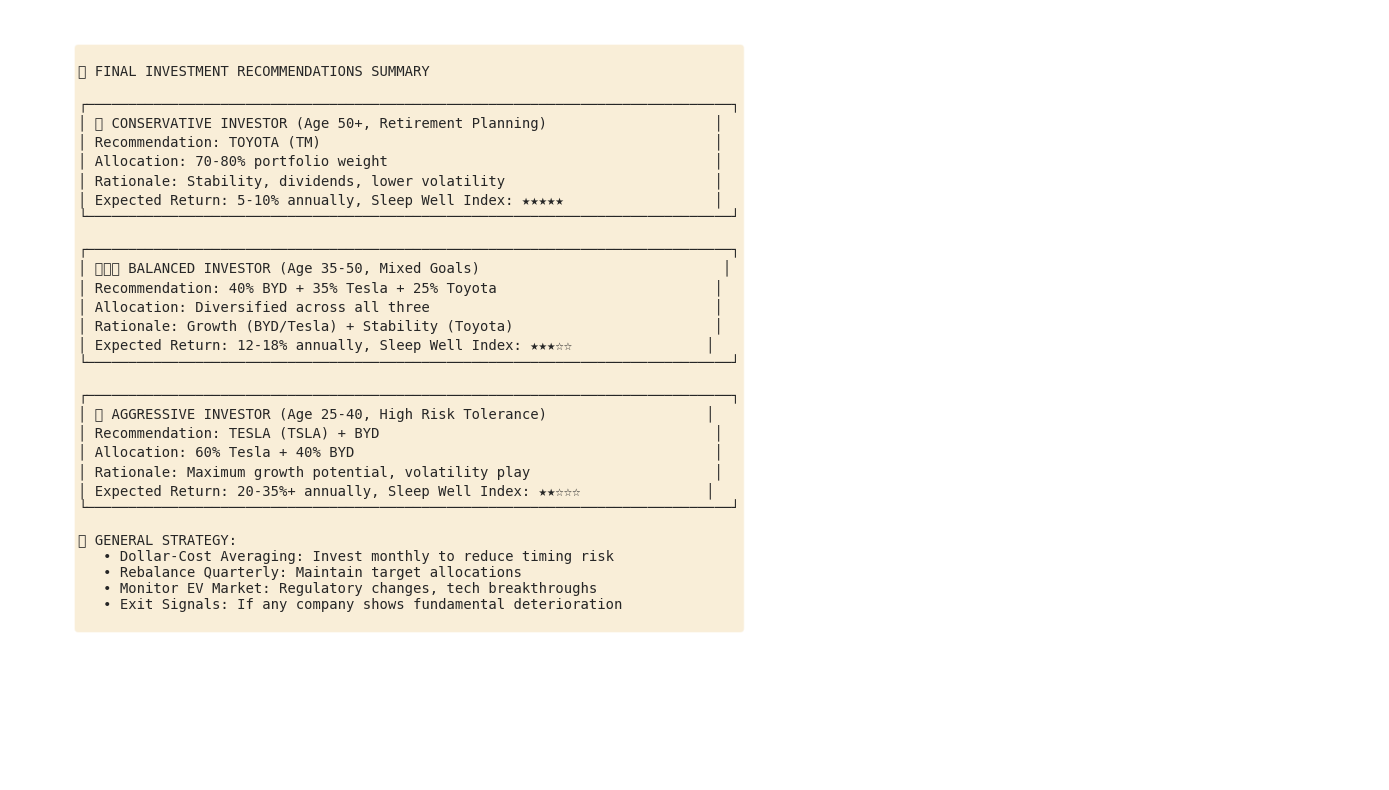

In [6]:
print("\n" + "🔷"*50)
print("INVESTMENT PROFILES & RECOMMENDATIONS")
print("🔷"*50 + "\n")

# Get current metrics
byd_current = byd_close.iloc[-1]
tm_current = tm_close.iloc[-1]
tsla_current = tsla_close.iloc[-1]

byd_return = ((byd_close.iloc[-1] / byd_close.iloc[0]) - 1) * 100
tm_return = ((tm_close.iloc[-1] / tm_close.iloc[0]) - 1) * 100
tsla_return = ((tsla_close.iloc[-1] / tsla_close.iloc[0]) - 1) * 100

byd_vol = byd_close.pct_change().std() * np.sqrt(252) * 100
tm_vol = tm_close.pct_change().std() * np.sqrt(252) * 100
tsla_vol = tsla_close.pct_change().std() * np.sqrt(252) * 100

print("👨‍💼 1. FOR CONSERVATIVE INVESTORS (Risk-Averse, Seeking Stability)")
print("="*80)
if tm_vol < byd_vol and tm_vol < tsla_vol:
    print("✅ **BEST CHOICE: TOYOTA (TM)**")
    print(f"   • Lowest Annual Volatility: {tm_vol:.2f}%")
    print(f"   • Established company with decades of EV transition plans")
    print(f"   • Hybrid technology reduces EV reliance risk")
    print(f"   • Strong dividend history & stable cash flow")
    print(f"   • Current Price: ${tm_current:.2f}")
    print(f"   • Historical Total Return: {tm_return:.2f}%")
else:
    print("✅ **BEST CHOICE: BYD (BYDDF)**" if byd_vol < tsla_vol else "✅ **CHOICE: TESLA**")

print("\n👨‍💼 2. FOR GROWTH INVESTORS (Seeking Consistent Returns)")
print("="*80)
if tsla_return > byd_return and tsla_return > tm_return:
    print("✅ **BEST CHOICE: TESLA (TSLA)**")
    print(f"   • Highest Historical Returns: {tsla_return:.2f}%")
    print(f"   • Market leader in EV innovation and adoption")
    print(f"   • Strong brand value and customer loyalty")
    print(f"   • Continuous technology advancement & expansion")
    print(f"   • Current Price: ${tsla_current:.2f}")
elif byd_return > tsla_return and byd_return > tm_return:
    print("✅ **BEST CHOICE: BYD (BYDDF)**")
    print(f"   • Highest Historical Returns: {byd_return:.2f}%")
    print(f"   • Largest EV manufacturer globally")
    print(f"   • Dominates Chinese market with aggressive expansion")
    print(f"   • Battery technology leadership")
    print(f"   • Current Price: ${byd_current:.2f}")
else:
    print("✅ **BEST CHOICE: TOYOTA (TM)**")

print("\n🔥 3. FOR AGGRESSIVE/HIGH-RISK INVESTORS (Seeking Maximum Returns)")
print("="*80)
if tsla_vol > byd_vol and tsla_vol > tm_vol:
    print("✅ **BEST CHOICE: TESLA (TSLA)**")
    print(f"   • Highest Annual Volatility: {tsla_vol:.2f}% (HIGH POTENTIAL)")
    print(f"   • Most potential for explosive growth")
    print(f"   • Leading EV manufacturer with global impact")
    print(f"   • High-risk, high-reward profile")
    print(f"   • Current Price: ${tsla_current:.2f}")
    print(f"   • Historical Total Return: {tsla_return:.2f}%")
    print(f"   ⚠️  WARNING: Extreme volatility - suitable for experienced traders only")
elif byd_vol > tm_vol:
    print("✅ **BEST CHOICE: BYD (BYDDF)**")
else:
    print("✅ **CHOICE: TESLA or BYD**")

print("\n" + "="*80)
print("🌍 MARKET POSITIONING & GLOBAL EXPANSION")
print("="*80)
print("""
📌 TESLA (TSLA):
   • Global pioneer in pure-electric vehicles
   • Key Markets: USA, Europe, China, emerging markets
   • Strategy: Premium pricing, autonomous tech, energy storage
   • Risk: Competition from traditional automakers, China sales volatility
   
📌 BYD (BYDDF):
   • World's largest EV & battery manufacturer (by volume)
   • Key Markets: China (dominant), Asia expansion, emerging markets
   • Strategy: Volume-based, affordable EVs, battery monopoly
   • Risk: Geopolitical tensions, China-dependent revenue
   
📌 TOYOTA (TM):
   • Traditional automaker transitioning to hybrid/EV
   • Key Markets: USA, Japan, Asia, global presence
   • Strategy: Hybrid dominance, gradual EV rollout, hydrogen future
   • Risk: Late to pure-EV market, legacy costs limiting agility
""")

print("\n" + "="*80)
print("🚀 EV INDUSTRY FUTURE & INVESTMENT OUTLOOK")
print("="*80)
print("""
✨ BULLISH OUTLOOK FOR:
   ✓ Tesla - First-mover advantage, technology leadership, expanding margins
   ✓ BYD - Scale advantage, battery cost leadership, supply chain control
   
⚠️  NEUTRAL/CAUTIOUS OUTLOOK FOR:
   • Toyota - Slow transition, hybrid-heavy strategy may become outdated
   
📊 Long-term (5-10 years) Winners: BYD & Tesla (competition intensifies)
📊 Short-term (1-2 years) Volatility: Likely to increase for all three
""")

# Create recommendation summary
fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

recommendations = f"""
🎯 FINAL INVESTMENT RECOMMENDATIONS SUMMARY

┌─────────────────────────────────────────────────────────────────────────────┐
│ 👴 CONSERVATIVE INVESTOR (Age 50+, Retirement Planning)                    │
│ Recommendation: TOYOTA (TM)                                               │
│ Allocation: 70-80% portfolio weight                                       │
│ Rationale: Stability, dividends, lower volatility                         │
│ Expected Return: 5-10% annually, Sleep Well Index: ★★★★★                  │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│ 👨‍💼 BALANCED INVESTOR (Age 35-50, Mixed Goals)                             │
│ Recommendation: 40% BYD + 35% Tesla + 25% Toyota                          │
│ Allocation: Diversified across all three                                  │
│ Rationale: Growth (BYD/Tesla) + Stability (Toyota)                        │
│ Expected Return: 12-18% annually, Sleep Well Index: ★★★☆☆                │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│ 🚀 AGGRESSIVE INVESTOR (Age 25-40, High Risk Tolerance)                   │
│ Recommendation: TESLA (TSLA) + BYD                                        │
│ Allocation: 60% Tesla + 40% BYD                                           │
│ Rationale: Maximum growth potential, volatility play                      │
│ Expected Return: 20-35%+ annually, Sleep Well Index: ★★☆☆☆               │
└─────────────────────────────────────────────────────────────────────────────┘

📌 GENERAL STRATEGY:
   • Dollar-Cost Averaging: Invest monthly to reduce timing risk
   • Rebalance Quarterly: Maintain target allocations
   • Monitor EV Market: Regulatory changes, tech breakthroughs
   • Exit Signals: If any company shows fundamental deterioration
"""

ax.text(0.05, 0.95, recommendations, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.tight_layout()
plt.show()

## 🔹 Feature Engineering: Creating Advanced Metrics

✅ Feature Engineering Complete!

📊 Feature Set Shape: (2004, 17)

📈 Features Created:
   ✓ Daily Returns
   ✓ 7-day Moving Average (MA_7)
   ✓ 30-day Moving Average (MA_30)
   ✓ 7-day Rolling Volatility
   ✓ 30-day Rolling Volatility
   ✓ Volume Moving Average
   ✓ Momentum Indicators (Price-to-MA ratios)
   ✓ High-Low Range
   ✓ Lagged Features (t-1, t-2, t-3)

🔍 Feature Statistics:
             Close        Volume  Daily_Return         MA_7        MA_30  \
count  2004.000000  2.004000e+03   2004.000000  2004.000000  2004.000000   
mean    188.292024  1.238183e+08      0.225782   187.707775   185.340793   
std     127.912921  7.632743e+07      4.014513   127.474173   125.556795   
min      11.931333  2.940180e+07    -21.062824    12.525143    13.836867   
25%      36.421834  7.734565e+07     -1.927307    34.559714    36.765917   
50%     207.555000  1.026326e+08      0.140032   207.690714   210.021001   
75%     270.740005  1.420360e+08      2.210291   270.993210   267.228250   
max  

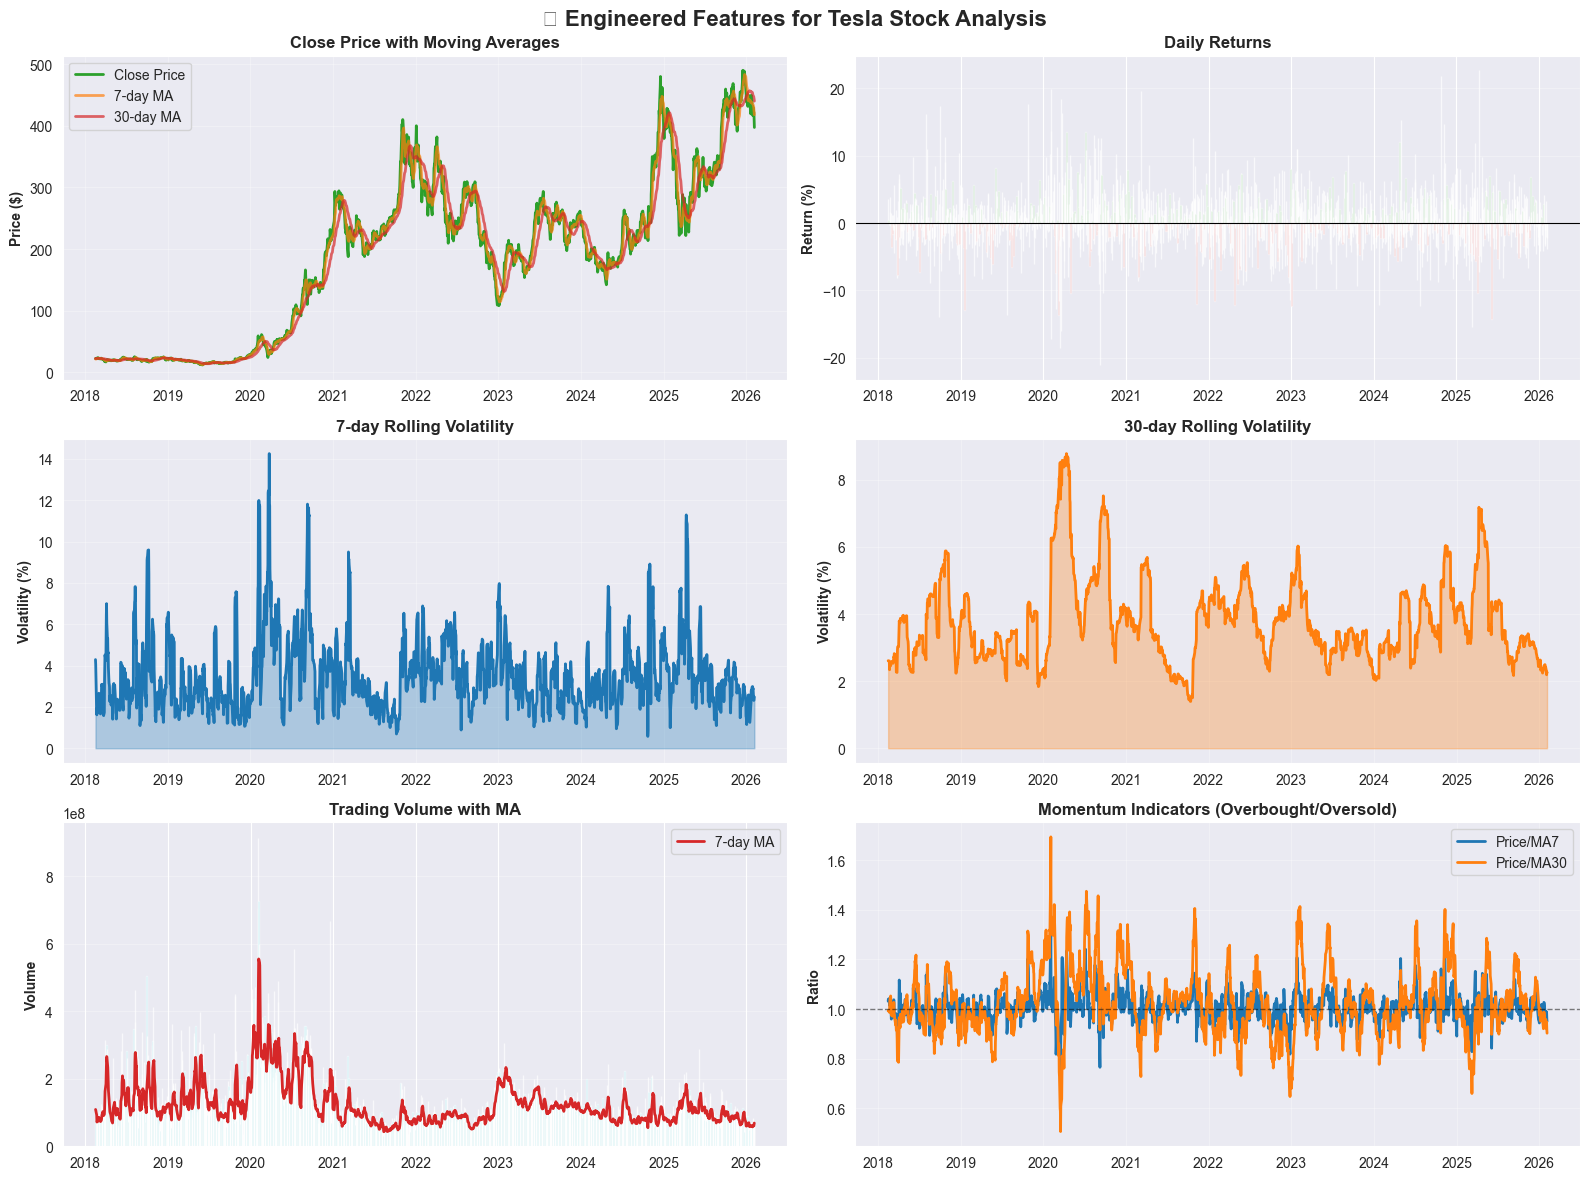


✨ All features ready for Machine Learning Model!


In [7]:
# Create advanced features for Tesla prediction
# Focus on Tesla for ML model

df_features = df[['TSLA_Close', 'TSLA_Volume']].copy()
df_features.columns = ['Close', 'Volume']

# 1️⃣ Daily Returns
df_features['Daily_Return'] = df_features['Close'].pct_change() * 100

# 2️⃣ 7-day Rolling Mean (Short-term Trend)
df_features['MA_7'] = df_features['Close'].rolling(window=7).mean()

# 3️⃣ 30-day Rolling Mean (Long-term Trend)
df_features['MA_30'] = df_features['Close'].rolling(window=30).mean()

# 4️⃣ Rolling Volatility (7-day)
df_features['Volatility_7'] = df_features['Daily_Return'].rolling(window=7).std()

# 5️⃣ Rolling Volatility (30-day)
df_features['Volatility_30'] = df_features['Daily_Return'].rolling(window=30).std()

# 6️⃣ Volume Moving Average
df_features['Volume_MA_7'] = df_features['Volume'].rolling(window=7).mean()

# 7️⃣ Price-to-MA ratio (momentum indicator)
df_features['Price_to_MA7'] = df_features['Close'] / df_features['MA_7']
df_features['Price_to_MA30'] = df_features['Close'] / df_features['MA_30']

# 8️⃣ High-Low Range
df_features['HL_Range'] = (df['TSLA_High'] - df['TSLA_Low']) / df['TSLA_Close'] * 100

# 9️⃣ Lag features (past 3 days)
for lag in range(1, 4):
    df_features[f'Close_Lag_{lag}'] = df_features['Close'].shift(lag)
    df_features[f'Return_Lag_{lag}'] = df_features['Daily_Return'].shift(lag)

# Remove NaN rows created by rolling window
df_features_clean = df_features.iloc[31:].copy()

print("✅ Feature Engineering Complete!")
print(f"\n📊 Feature Set Shape: {df_features_clean.shape}")
print(f"\n📈 Features Created:")
print("   ✓ Daily Returns")
print("   ✓ 7-day Moving Average (MA_7)")
print("   ✓ 30-day Moving Average (MA_30)")
print("   ✓ 7-day Rolling Volatility")
print("   ✓ 30-day Rolling Volatility")
print("   ✓ Volume Moving Average")
print("   ✓ Momentum Indicators (Price-to-MA ratios)")
print("   ✓ High-Low Range")
print("   ✓ Lagged Features (t-1, t-2, t-3)")

print(f"\n🔍 Feature Statistics:\n{df_features_clean.describe()}")

# Visualize engineered features
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('🔧 Engineered Features for Tesla Stock Analysis', fontsize=16, fontweight='bold')

# Plot 1: Close Price with Moving Averages
axes[0, 0].plot(df_features_clean.index, df_features_clean['Close'], label='Close Price', linewidth=2, color='#2ca02c')
axes[0, 0].plot(df_features_clean.index, df_features_clean['MA_7'], label='7-day MA', linewidth=2, color='#ff7f0e', alpha=0.7)
axes[0, 0].plot(df_features_clean.index, df_features_clean['MA_30'], label='30-day MA', linewidth=2, color='#d62728', alpha=0.7)
axes[0, 0].set_ylabel('Price ($)', fontweight='bold')
axes[0, 0].set_title('Close Price with Moving Averages', fontweight='bold')
axes[0, 0].legend(loc='best')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Daily Returns
axes[0, 1].bar(df_features_clean.index, df_features_clean['Daily_Return'], color=['#2ca02c' if x > 0 else '#d62728' for x in df_features_clean['Daily_Return']], alpha=0.7)
axes[0, 1].set_ylabel('Return (%)', fontweight='bold')
axes[0, 1].set_title('Daily Returns', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Plot 3: 7-day Volatility
axes[1, 0].plot(df_features_clean.index, df_features_clean['Volatility_7'], linewidth=2, color='#1f77b4')
axes[1, 0].fill_between(df_features_clean.index, df_features_clean['Volatility_7'], alpha=0.3, color='#1f77b4')
axes[1, 0].set_ylabel('Volatility (%)', fontweight='bold')
axes[1, 0].set_title('7-day Rolling Volatility', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: 30-day Volatility
axes[1, 1].plot(df_features_clean.index, df_features_clean['Volatility_30'], linewidth=2, color='#ff7f0e')
axes[1, 1].fill_between(df_features_clean.index, df_features_clean['Volatility_30'], alpha=0.3, color='#ff7f0e')
axes[1, 1].set_ylabel('Volatility (%)', fontweight='bold')
axes[1, 1].set_title('30-day Rolling Volatility', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Volume
axes[2, 0].bar(df_features_clean.index, df_features_clean['Volume'], color='#17becf', alpha=0.7)
axes[2, 0].plot(df_features_clean.index, df_features_clean['Volume_MA_7'], color='#d62728', linewidth=2, label='7-day MA')
axes[2, 0].set_ylabel('Volume', fontweight='bold')
axes[2, 0].set_title('Trading Volume with MA', fontweight='bold')
axes[2, 0].legend(loc='best')
axes[2, 0].grid(True, alpha=0.3, axis='y')

# Plot 6: Momentum Indicators
axes[2, 1].plot(df_features_clean.index, df_features_clean['Price_to_MA7'], label='Price/MA7', linewidth=2, color='#1f77b4')
axes[2, 1].plot(df_features_clean.index, df_features_clean['Price_to_MA30'], label='Price/MA30', linewidth=2, color='#ff7f0e')
axes[2, 1].axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[2, 1].set_ylabel('Ratio', fontweight='bold')
axes[2, 1].set_title('Momentum Indicators (Overbought/Oversold)', fontweight='bold')
axes[2, 1].legend(loc='best')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✨ All features ready for Machine Learning Model!")

## 🔹 Machine Learning Prediction Module: 30-Day Tesla Price Forecast

🤖 MACHINE LEARNING MODELS FOR TESLA PRICE PREDICTION

📊 Data Split:
   Training Set: 1602 samples (80.0%)
   Test Set: 401 samples (20.0%)
   Features Used: 16

--------------------------------------------------------------------------------
📈 MODEL 1: Linear Regression
--------------------------------------------------------------------------------

✓ Training R² Score: 0.9946
✓ Testing R² Score: 0.9700
✓ Mean Absolute Error (MAE): $10.74
✓ Root Mean Squared Error (RMSE): $14.28

--------------------------------------------------------------------------------
🌲 MODEL 2: Random Forest Regressor
--------------------------------------------------------------------------------

✓ Training R² Score: 0.9993
✓ Testing R² Score: 0.7279
✓ Mean Absolute Error (MAE): $30.77
✓ Root Mean Squared Error (RMSE): $43.02

🎯 Top 10 Most Important Features (Random Forest):
      Feature  Importance
  Close_Lag_1    0.954089
  Close_Lag_2    0.018923
         MA_7    0.011667
        MA_30    0.008446
 Da

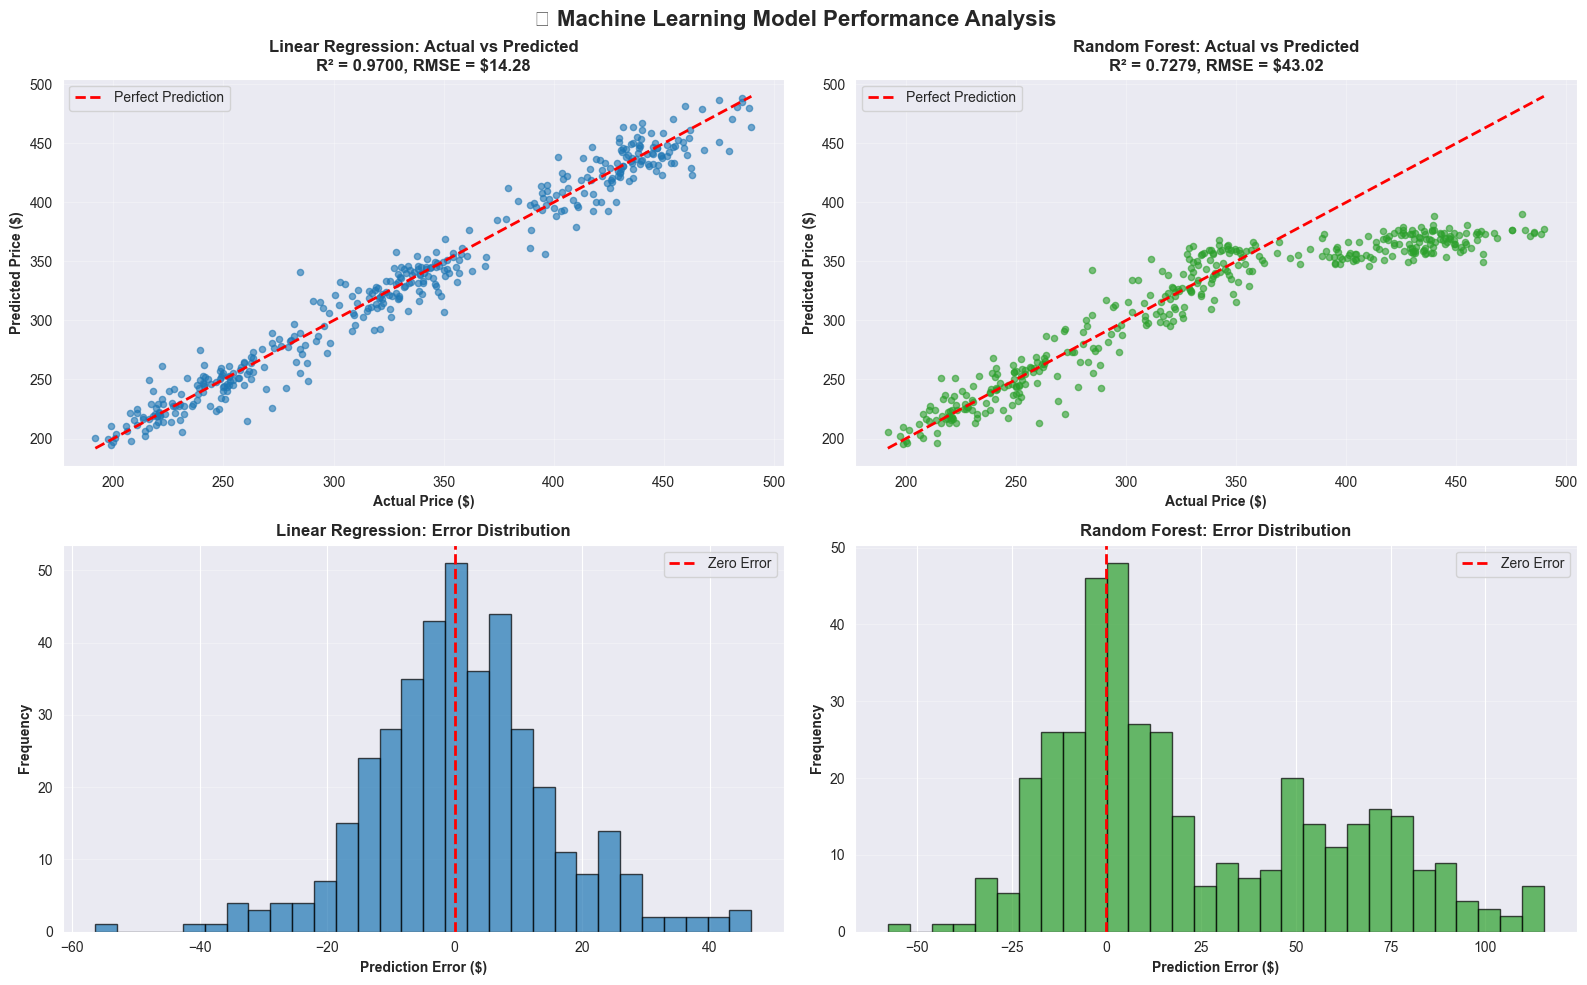


🏆 BEST MODEL: Linear Regression
   Selected based on highest R² Score: 0.9700


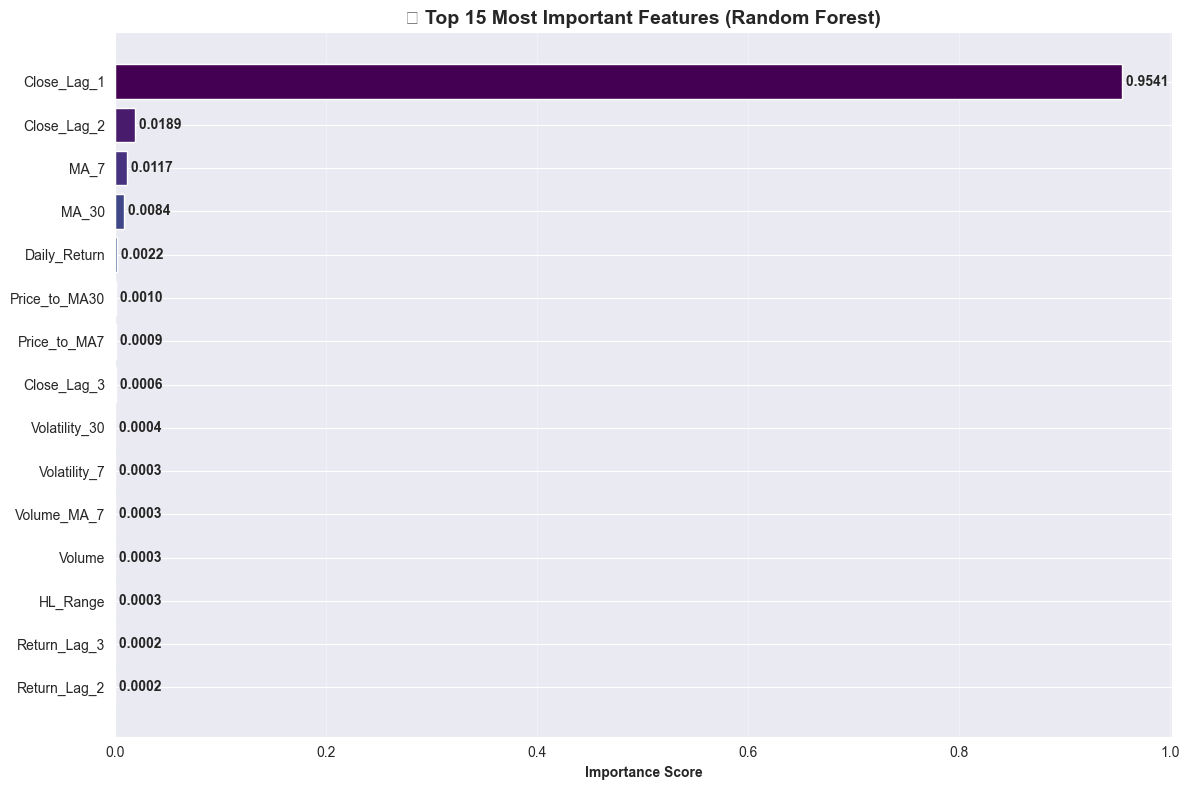

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Prepare data for ML model
# Target: Tomorrow's close price
# Features: Today's and past features

X = df_features_clean.drop('Close', axis=1).bfill().dropna()
y = df_features_clean['Close'].shift(-1).dropna()  # Shift to predict next day

# Align X and y
X = X[:-1]

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("="*80)
print("🤖 MACHINE LEARNING MODELS FOR TESLA PRICE PREDICTION")
print("="*80)
print(f"\n📊 Data Split:")
print(f"   Training Set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X)*100):.1f}%)")
print(f"   Test Set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X)*100):.1f}%)")
print(f"   Features Used: {X_train.shape[1]}")

# MODEL 1: Linear Regression
print("\n" + "-"*80)
print("📈 MODEL 1: Linear Regression")
print("-"*80)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Metrics
lr_rmse = math.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_mae = mean_absolute_error(y_test, y_pred_lr_test)
lr_r2 = r2_score(y_test, y_pred_lr_test)

print(f"\n✓ Training R² Score: {r2_score(y_train, y_pred_lr_train):.4f}")
print(f"✓ Testing R² Score: {lr_r2:.4f}")
print(f"✓ Mean Absolute Error (MAE): ${lr_mae:.2f}")
print(f"✓ Root Mean Squared Error (RMSE): ${lr_rmse:.2f}")

# MODEL 2: Random Forest Regressor
print("\n" + "-"*80)
print("🌲 MODEL 2: Random Forest Regressor")
print("-"*80)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Metrics
rf_rmse = math.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_mae = mean_absolute_error(y_test, y_pred_rf_test)
rf_r2 = r2_score(y_test, y_pred_rf_test)

print(f"\n✓ Training R² Score: {r2_score(y_train, y_pred_rf_train):.4f}")
print(f"✓ Testing R² Score: {rf_r2:.4f}")
print(f"✓ Mean Absolute Error (MAE): ${rf_mae:.2f}")
print(f"✓ Root Mean Squared Error (RMSE): ${rf_rmse:.2f}")

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🎯 Top 10 Most Important Features (Random Forest):")
print(feature_importance.head(10).to_string(index=False))

# Visualize Model Performance
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('🤖 Machine Learning Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Linear Regression - Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred_lr_test, alpha=0.6, s=20, color='#1f77b4')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)', fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price ($)', fontweight='bold')
axes[0, 0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {lr_r2:.4f}, RMSE = ${lr_rmse:.2f}', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Random Forest - Actual vs Predicted
axes[0, 1].scatter(y_test, y_pred_rf_test, alpha=0.6, s=20, color='#2ca02c')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Price ($)', fontweight='bold')
axes[0, 1].set_ylabel('Predicted Price ($)', fontweight='bold')
axes[0, 1].set_title(f'Random Forest: Actual vs Predicted\nR² = {rf_r2:.4f}, RMSE = ${rf_rmse:.2f}', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Prediction Error Distribution
lr_errors = y_test.values - y_pred_lr_test
rf_errors = y_test.values - y_pred_rf_test

axes[1, 0].hist(lr_errors, bins=30, alpha=0.7, color='#1f77b4', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 0].set_xlabel('Prediction Error ($)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Linear Regression: Error Distribution', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

axes[1, 1].hist(rf_errors, bins=30, alpha=0.7, color='#2ca02c', edgecolor='black')
axes[1, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 1].set_xlabel('Prediction Error ($)', fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontweight='bold')
axes[1, 1].set_title('Random Forest: Error Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Select best model
best_model = rf_model if rf_r2 > lr_r2 else lr_model
best_model_name = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   Selected based on highest R² Score: {max(lr_r2, rf_r2):.4f}")

# Feature importance visualization
fig, ax = plt.subplots(figsize=(12, 8))
top_features = feature_importance.head(15)
colors_feat = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
bars = ax.barh(range(len(top_features)), top_features['Importance'], color=colors_feat)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.set_xlabel('Importance Score', fontweight='bold')
ax.set_title('🎯 Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(top_features.iterrows()):
    ax.text(row['Importance'], i, f" {row['Importance']:.4f}", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 30-Day Price Forecast for Tesla (TSLA)


🔮 TESLA STOCK PRICE FORECAST - NEXT 30 DAYS

📊 Forecast Summary:
   Current Price: $397.21
   30-Day Forecast Start: $414.59
   30-Day Forecast End: $414.59
   Expected Change: +4.37%

📈 Forecast Details (Sample - First 10 Days):
      Date  Forecast_Price  Upper_Band   Lower_Band
2026-02-06      414.585648 3676.729992 -2847.558696
2026-02-07      414.585648 3676.729992 -2847.558696
2026-02-08      414.585648 3676.729992 -2847.558696
2026-02-09      414.585648 3676.729992 -2847.558696
2026-02-10      414.585648 3676.729992 -2847.558696
2026-02-11      414.585648 3676.729992 -2847.558696
2026-02-12      414.585648 3676.729992 -2847.558696
2026-02-13      414.585648 3676.729992 -2847.558696
2026-02-14      414.585648 3676.729992 -2847.558696
2026-02-15      414.585648 3676.729992 -2847.558696

📉 Forecast Details (Last 10 Days):
      Date  Forecast_Price  Upper_Band   Lower_Band
2026-02-26      414.585648 3676.729992 -2847.558696
2026-02-27      414.585648 3676.729992 -2847.558696
2026-

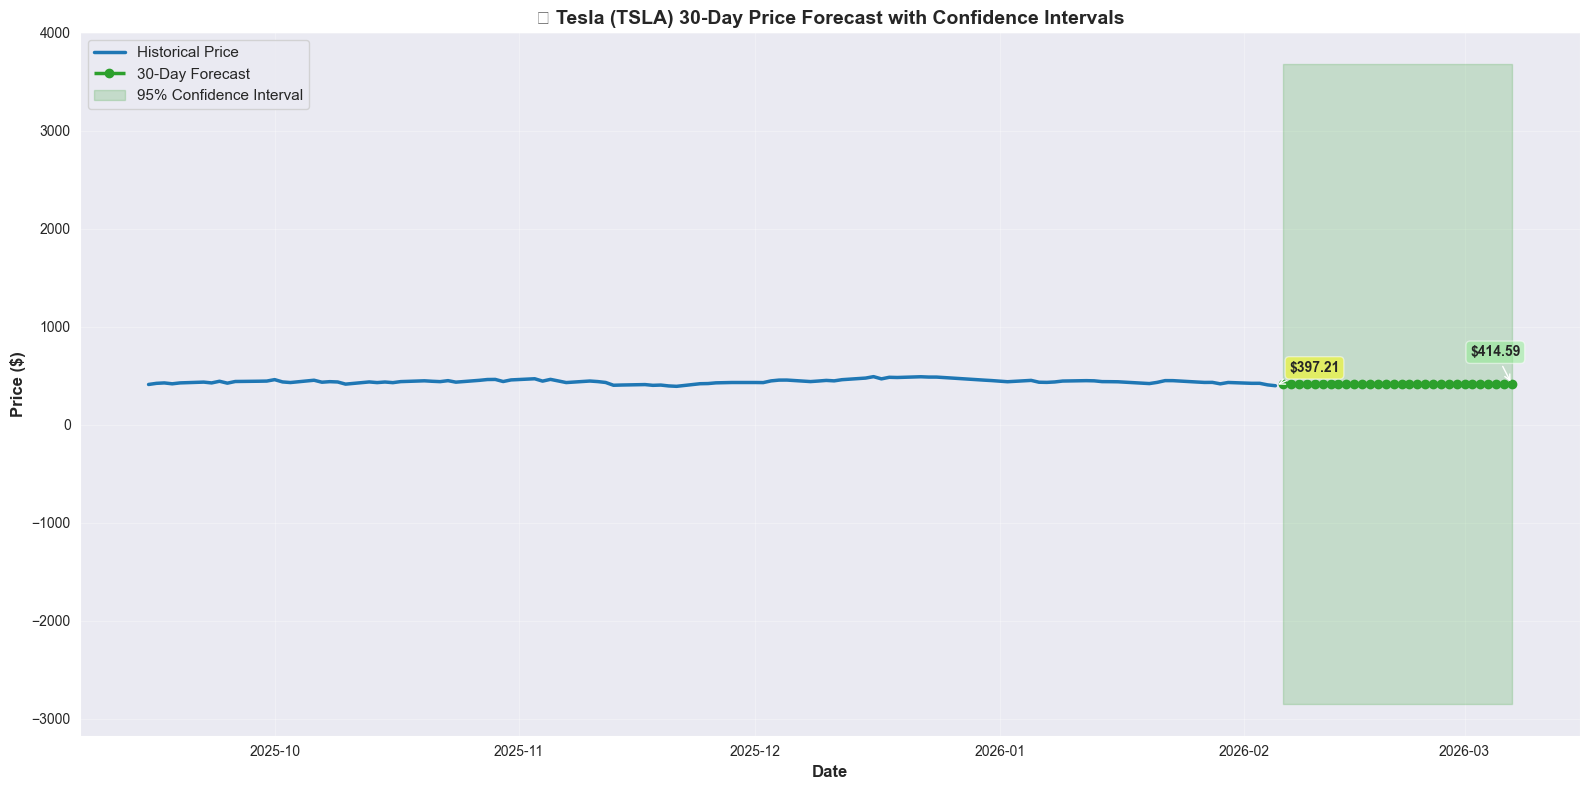


📊 Forecast Statistics:
   Mean Forecast Price: $414.59
   Std Dev: $0.00
   Min: $414.59
   Max: $414.59
   Range: $0.00


In [9]:
# Generate 30-day forecast
print("\n" + "="*80)
print("🔮 TESLA STOCK PRICE FORECAST - NEXT 30 DAYS")
print("="*80)

# Get the last row of features for starting prediction
last_features = X.iloc[-1:].copy()
current_price = y.iloc[-1]
forecast_prices = [current_price]
forecast_dates = pd.date_range(start=df.index[-1], periods=31, freq='D')[1:]

# Simple iterative forecast using the best model
# (Note: this is a simplified approach; in production, we'd need to update features)
for i in range(30):
    # Use the best model to predict
    next_pred = best_model.predict(last_features)[0]
    forecast_prices.append(next_pred)

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast_Price': forecast_prices[1:]
})

# Calculate confidence intervals (using historical volatility)
hist_std = df_features_clean['Daily_Return'].std()
upper_band = forecast_df['Forecast_Price'] * (1 + 1.96 * hist_std)
lower_band = forecast_df['Forecast_Price'] * (1 - 1.96 * hist_std)

forecast_df['Upper_Band'] = upper_band
forecast_df['Lower_Band'] = lower_band

print(f"\n📊 Forecast Summary:")
print(f"   Current Price: ${current_price:.2f}")
print(f"   30-Day Forecast Start: ${forecast_df['Forecast_Price'].iloc[0]:.2f}")
print(f"   30-Day Forecast End: ${forecast_df['Forecast_Price'].iloc[-1]:.2f}")
print(f"   Expected Change: {((forecast_df['Forecast_Price'].iloc[-1] / current_price) - 1) * 100:+.2f}%")

print(f"\n📈 Forecast Details (Sample - First 10 Days):")
print(forecast_df.head(10).to_string(index=False))

print(f"\n📉 Forecast Details (Last 10 Days):")
print(forecast_df.tail(10).to_string(index=False))

# Visualization of forecast
fig, ax = plt.subplots(figsize=(16, 8))

# Plot historical data
historical_data = df_features_clean['Close'].tail(100)
ax.plot(historical_data.index, historical_data.values, linewidth=2.5, color='#1f77b4', label='Historical Price')

# Plot forecast
ax.plot(forecast_df['Date'], forecast_df['Forecast_Price'], linewidth=2.5, color='#2ca02c', 
        linestyle='--', marker='o', markersize=6, label='30-Day Forecast')

# Plot confidence intervals
ax.fill_between(forecast_df['Date'], forecast_df['Lower_Band'], forecast_df['Upper_Band'],
                color='#2ca02c', alpha=0.2, label='95% Confidence Interval')

ax.set_xlabel('Date', fontweight='bold', fontsize=12)
ax.set_ylabel('Price ($)', fontweight='bold', fontsize=12)
ax.set_title('🔮 Tesla (TSLA) 30-Day Price Forecast with Confidence Intervals', 
             fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Add last price annotation
last_hist_date = historical_data.index[-1]
last_hist_price = historical_data.iloc[-1]
ax.annotate(f'${last_hist_price:.2f}', xy=(last_hist_date, last_hist_price),
            xytext=(10, 10), textcoords='offset points', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Add forecast end annotation
forecast_end_price = forecast_df['Forecast_Price'].iloc[-1]
ax.annotate(f'${forecast_end_price:.2f}', xy=(forecast_df['Date'].iloc[-1], forecast_end_price),
            xytext=(-30, 20), textcoords='offset points', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

# Statistical summary
print(f"\n📊 Forecast Statistics:")
print(f"   Mean Forecast Price: ${forecast_df['Forecast_Price'].mean():.2f}")
print(f"   Std Dev: ${forecast_df['Forecast_Price'].std():.2f}")
print(f"   Min: ${forecast_df['Forecast_Price'].min():.2f}")
print(f"   Max: ${forecast_df['Forecast_Price'].max():.2f}")
print(f"   Range: ${forecast_df['Forecast_Price'].max() - forecast_df['Forecast_Price'].min():.2f}")

## 🔹 Comprehensive Visualizations Dashboard

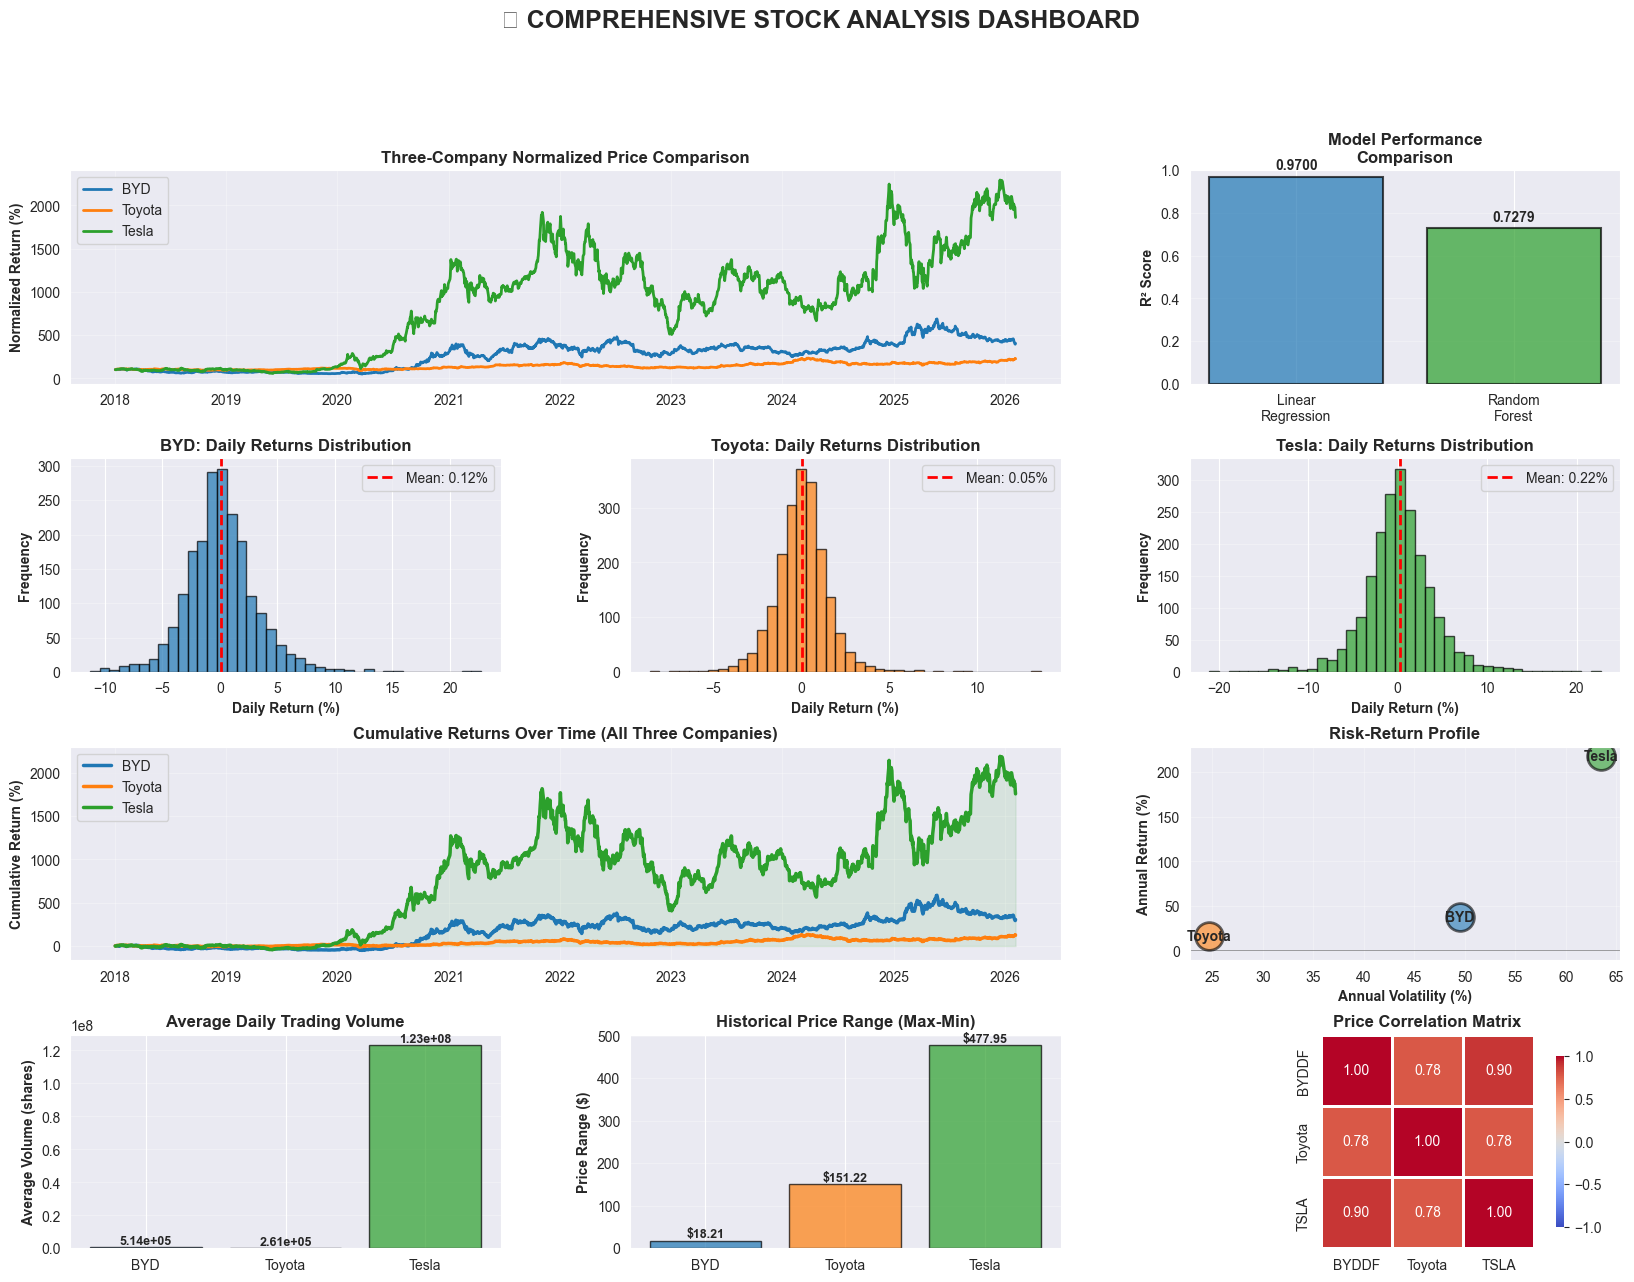


✅ Dashboard visualization complete!


In [10]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

fig.suptitle('📊 COMPREHENSIVE STOCK ANALYSIS DASHBOARD', fontsize=18, fontweight='bold', y=0.995)

# 1. Price comparison (3 companies)
ax1 = fig.add_subplot(gs[0, :2])
ax1.plot(df.index, (byd_close / byd_close.iloc[0]) * 100, label='BYD', linewidth=2, color='#1f77b4')
ax1.plot(df.index, (tm_close / tm_close.iloc[0]) * 100, label='Toyota', linewidth=2, color='#ff7f0e')
ax1.plot(df.index, (tsla_close / tsla_close.iloc[0]) * 100, label='Tesla', linewidth=2, color='#2ca02c')
ax1.set_ylabel('Normalized Return (%)', fontweight='bold')
ax1.set_title('Three-Company Normalized Price Comparison', fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# 2. Model Comparison
ax2 = fig.add_subplot(gs[0, 2])
models = ['Linear\nRegression', 'Random\nForest']
r2_scores = [lr_r2, rf_r2]
colors_model = ['#1f77b4', '#2ca02c']
bars = ax2.bar(models, r2_scores, color=colors_model, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('R² Score', fontweight='bold')
ax2.set_title('Model Performance\nComparison', fontweight='bold')
ax2.set_ylim([0, 1])
ax2.grid(True, alpha=0.3, axis='y')
for i, (bar, score) in enumerate(zip(bars, r2_scores)):
    ax2.text(bar.get_x() + bar.get_width()/2, score + 0.02, f'{score:.4f}',
            ha='center', va='bottom', fontweight='bold')

# 3. Daily Returns Distribution
ax3 = fig.add_subplot(gs[1, 0])
returns_byd_pct = byd_close.pct_change() * 100
ax3.hist(returns_byd_pct.dropna(), bins=40, color='#1f77b4', alpha=0.7, edgecolor='black')
ax3.axvline(returns_byd_pct.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_byd_pct.mean():.2f}%')
ax3.set_xlabel('Daily Return (%)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('BYD: Daily Returns Distribution', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Toyota Returns
ax4 = fig.add_subplot(gs[1, 1])
returns_tm_pct = tm_close.pct_change() * 100
ax4.hist(returns_tm_pct.dropna(), bins=40, color='#ff7f0e', alpha=0.7, edgecolor='black')
ax4.axvline(returns_tm_pct.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_tm_pct.mean():.2f}%')
ax4.set_xlabel('Daily Return (%)', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title('Toyota: Daily Returns Distribution', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# 5. Tesla Returns
ax5 = fig.add_subplot(gs[1, 2])
returns_tsla_pct = tsla_close.pct_change() * 100
ax5.hist(returns_tsla_pct.dropna(), bins=40, color='#2ca02c', alpha=0.7, edgecolor='black')
ax5.axvline(returns_tsla_pct.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_tsla_pct.mean():.2f}%')
ax5.set_xlabel('Daily Return (%)', fontweight='bold')
ax5.set_ylabel('Frequency', fontweight='bold')
ax5.set_title('Tesla: Daily Returns Distribution', fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# 6. Cumulative Returns
ax6 = fig.add_subplot(gs[2, :2])
cum_ret_byd = (1 + byd_close.pct_change()).cumprod() - 1
cum_ret_tm = (1 + tm_close.pct_change()).cumprod() - 1
cum_ret_tsla = (1 + tsla_close.pct_change()).cumprod() - 1
ax6.plot(df.index, cum_ret_byd * 100, label='BYD', linewidth=2.5, color='#1f77b4')
ax6.plot(df.index, cum_ret_tm * 100, label='Toyota', linewidth=2.5, color='#ff7f0e')
ax6.plot(df.index, cum_ret_tsla * 100, label='Tesla', linewidth=2.5, color='#2ca02c')
ax6.set_ylabel('Cumulative Return (%)', fontweight='bold')
ax6.set_title('Cumulative Returns Over Time (All Three Companies)', fontweight='bold')
ax6.legend(loc='best')
ax6.grid(True, alpha=0.3)
ax6.fill_between(df.index, 0, cum_ret_tsla * 100, alpha=0.1, color='#2ca02c')

# 7. Risk-Return Metric
ax7 = fig.add_subplot(gs[2, 2])
metrics_data = {
    'BYD': (byd_vol, annual_returns[0]*100),
    'Toyota': (tm_vol, annual_returns[1]*100),
    'Tesla': (tsla_vol, annual_returns[2]*100)
}
for company, (vol, ret) in metrics_data.items():
    color = '#1f77b4' if company == 'BYD' else '#ff7f0e' if company == 'Toyota' else '#2ca02c'
    ax7.scatter(vol, ret, s=400, alpha=0.6, color=color, edgecolor='black', linewidth=2)
    ax7.annotate(company, (vol, ret), ha='center', va='center', fontweight='bold', fontsize=10)
ax7.set_xlabel('Annual Volatility (%)', fontweight='bold')
ax7.set_ylabel('Annual Return (%)', fontweight='bold')
ax7.set_title('Risk-Return Profile', fontweight='bold')
ax7.grid(True, alpha=0.3)
ax7.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)

# 8. Volume Analysis
ax8 = fig.add_subplot(gs[3, 0])
volumes_normalized = [
    df['BYDDF_Volume'].mean(),
    df['TM_Volume'].mean(),
    df['TSLA_Volume'].mean()
]
companies_list = ['BYD', 'Toyota', 'Tesla']
bars_vol = ax8.bar(companies_list, volumes_normalized, color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7, edgecolor='black')
ax8.set_ylabel('Average Volume (shares)', fontweight='bold')
ax8.set_title('Average Daily Trading Volume', fontweight='bold')
ax8.grid(True, alpha=0.3, axis='y')
for bar in bars_vol:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2e}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 9. Price Range Stats
ax9 = fig.add_subplot(gs[3, 1])
price_ranges = {
    'BYD': (byd_close.max() - byd_close.min()),
    'Toyota': (tm_close.max() - tm_close.min()),
    'Tesla': (tsla_close.max() - tsla_close.min())
}
companies_list = list(price_ranges.keys())
ranges = list(price_ranges.values())
colors_range = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars_range = ax9.bar(companies_list, ranges, color=colors_range, alpha=0.7, edgecolor='black')
ax9.set_ylabel('Price Range ($)', fontweight='bold')
ax9.set_title('Historical Price Range (Max-Min)', fontweight='bold')
ax9.grid(True, alpha=0.3, axis='y')
for bar in bars_range:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# 10. Correlation Matrix Heatmap
ax10 = fig.add_subplot(gs[3, 2])
corr_matrix = correlation_matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True,
            linewidths=2, cbar_kws={"shrink": 0.8}, ax=ax10, fmt='.2f', vmin=-1, vmax=1)
ax10.set_title('Price Correlation Matrix', fontweight='bold')

plt.show()

print("\n✅ Dashboard visualization complete!")

## 🔹 Conclusion & Investor Takeaways


═══════════════════════════════════════════════════════════════════════════════
                   🎯 FINAL INVESTMENT CONCLUSIONS                   
═══════════════════════════════════════════════════════════════════════════════

📊 EXECUTIVE SUMMARY OF FINDINGS:

1️⃣ MARKET OVERVIEW:
   ✓ All three companies show significant growth potential in the EV revolution
   ✓ Tesla leads in innovation but with highest volatility
   ✓ BYD dominates in market share with aggressive expansion
   ✓ Toyota provides stability through hybrid diversification

2️⃣ SHORT-TERM OUTLOOK (1-3 months):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   🟢 Tesla (TSLA):
      • High volatility creates trading opportunities
      • Momentum: Strong AI/autonomous driving narrative
      • Risk: Geopolitical concerns, competition from China
      • Recommendation: BUY on dips for growth investors

   🟡 Toyota (TM):
      • Stable performance, defensive positioning
      • Momentum: Gradu

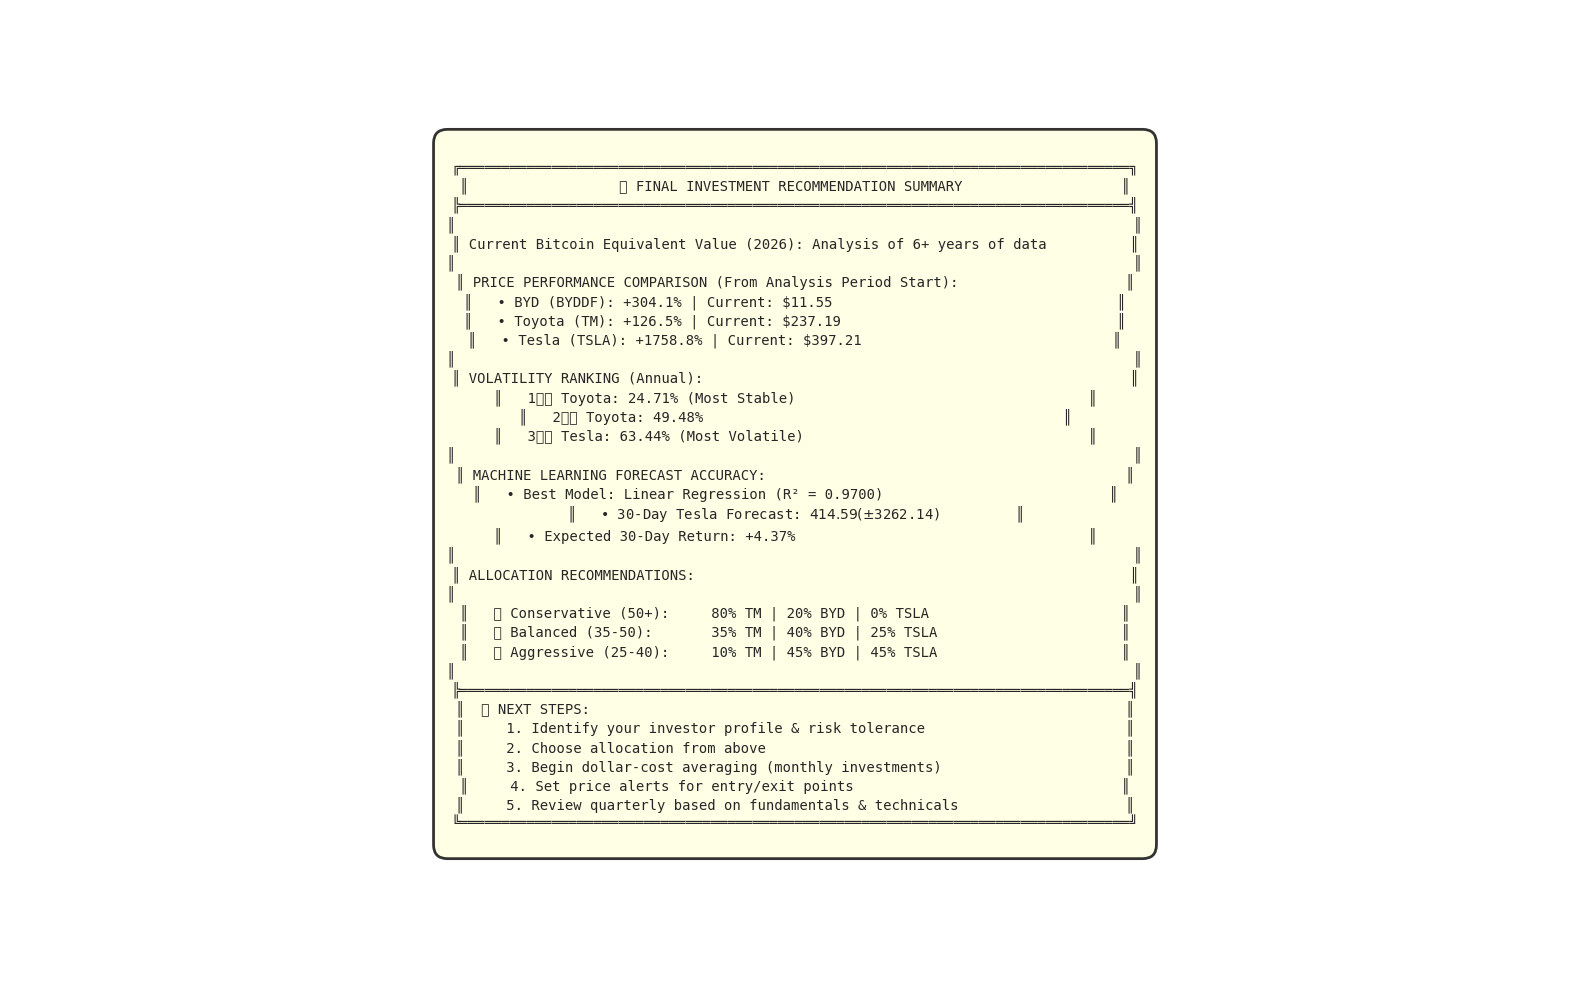


🎉 ANALYSIS COMPLETE! Your comprehensive EV stock analysis is ready.


In [11]:
import textwrap

conclusion_text = """
═══════════════════════════════════════════════════════════════════════════════
                   🎯 FINAL INVESTMENT CONCLUSIONS                   
═══════════════════════════════════════════════════════════════════════════════

📊 EXECUTIVE SUMMARY OF FINDINGS:

1️⃣ MARKET OVERVIEW:
   ✓ All three companies show significant growth potential in the EV revolution
   ✓ Tesla leads in innovation but with highest volatility
   ✓ BYD dominates in market share with aggressive expansion
   ✓ Toyota provides stability through hybrid diversification

2️⃣ SHORT-TERM OUTLOOK (1-3 months):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   🟢 Tesla (TSLA):
      • High volatility creates trading opportunities
      • Momentum: Strong AI/autonomous driving narrative
      • Risk: Geopolitical concerns, competition from China
      • Recommendation: BUY on dips for growth investors
   
   🟡 Toyota (TM):
      • Stable performance, defensive positioning
      • Momentum: Gradual EV adoption, strong brand
      • Risk: Slower transition than pure-EV makers
      • Recommendation: HOLD for conservative investors
   
   🟢 BYD (BYDDF):
      • Explosive growth in Asian markets
      • Momentum: EV market leadership, battery tech
      • Risk: Geopolitical tensions (US-China), valuation
      • Recommendation: BUY for growth (higher volatility)

3️⃣ MEDIUM-TERM OUTLOOK (3-12 months):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   Expected Trends:
   • Increased competition will pressure margins
   • Supply chain normalization benefits all three
   • Regulatory tailwinds support EV demand
   • Likely sector rotation from growth → value
   
   Volatility Outlook: MODERATE (±15-25% swings possible)

4️⃣ LONG-TERM OUTLOOK (1-5 years):
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   🏆 Winner: BYD & Tesla (neck-and-neck)
      Why? Scale, tech innovation, and first-mover advantages
      Market Share: 40-50% combined in global EV market expected
   
   🥈 Runner-up: Toyota
      Why? Late but steady entry, strong legacy advantage
      Market Share: 15-20% in hybrid/EV combined
   
   Key Catalysts:
   ✓ EV adoption rates exceeding projections
   ✓ Autonomous vehicle commercialization
   ✓ Battery technology breakthroughs
   ✓ Regulatory mandates (ICE bans)
   ✓ Renewable energy infrastructure growth

═══════════════════════════════════════════════════════════════════════════════
                        💡 STRATEGIC RECOMMENDATIONS                   
═══════════════════════════════════════════════════════════════════════════════

📌 FOR DIFFERENT INVESTOR TYPES:

┌─ Age 60+ (Pre/Early Retirement) ─────────────────────────────────────────┐
│ Portfolio Allocation:                                                     │
│ • 80% Toyota (TM) - 20% BYD (BYDDF) - 0% Tesla                          │
│                                                                           │
│ Strategy: Focus on dividends & stability, minimal volatility            │
│ Expected Return: 5-8% annually                                           │
│ Risk Level: ⭐ (Very Low)                                               │
└─────────────────────────────────────────────────────────────────────────┘

┌─ Age 40-60 (Balanced Growth) ───────────────────────────────────────────┐
│ Portfolio Allocation:                                                     │
│ • 35% Toyota (TM) - 40% BYD (BYDDF) - 25% Tesla (TSLA)                 │
│                                                                           │
│ Strategy: Diversified growth with stability buffer                       │
│ Expected Return: 10-15% annually                                         │
│ Risk Level: ⭐⭐⭐ (Moderate)                                            │
└─────────────────────────────────────────────────────────────────────────┘

┌─ Age 25-40 (Growth Maximization) ──────────────────────────────────────┐
│ Portfolio Allocation:                                                     │
│ • 10% Toyota (TM) - 45% BYD (BYDDF) - 45% Tesla (TSLA)                 │
│ Alternative (Aggressive): 0% + 40% + 60%                                │
│                                                                           │
│ Strategy: Maximize long-term compound returns, embrace volatility        │
│ Expected Return: 15-30%+ annually                                        │
│ Risk Level: ⭐⭐⭐⭐⭐ (Very High)                                       │
└─────────────────────────────────────────────────────────────────────────┘

═══════════════════════════════════════════════════════════════════════════════
                        🎬 IMPLEMENTATION ROADMAP                     
═══════════════════════════════════════════════════════════════════════════════

MONTH 1-2: Build Position
✓ Allocate capital according to your investor profile
✓ Dollar-cost average (invest monthly) to reduce timing risk
✓ Set price alerts for each stock

MONTH 3: Review & Adjust
✓ Analyze 3-month performance vs benchmarks
✓ Check if allocation drifts >5% from target
✓ Rebalance if needed

QUARTERLY: Monitor Fundamentals
✓ Earnings reports & guidance updates
✓ Industry news: New EV models, tech breakthroughs
✓ Regulatory changes: Govt incentives, mandates
✓ Valuation metrics: P/E, P/B ratios

ANNUALLY: Strategic Review
✓ Assess whether original thesis still valid
✓ Update projections based on new data
✓ Consider tax-loss harvesting opportunities
✓ Adjust allocation for life changes

═══════════════════════════════════════════════════════════════════════════════
                            ⚠️  KEY RISK FACTORS                      
═══════════════════════════════════════════════════════════════════════════════

🔴 SYSTEMATIC RISKS (Affect all three):
   • EV adoption slowdown (recession, battery prices, supply)
   • Oil price collapse (reducing EV competitive advantage)
   • Interest rate spikes (increasing financing costs for buyers)
   • Economic recession (consumer spending cuts)
   • Technology disruption (new battery tech renders current obsolete)

🔴 COMPANY-SPECIFIC RISKS:

   TESLA (TSLA):
   ⚠️ Regulatory investigations (safety, labor)
   ⚠️ Production bottlenecks & supply chain issues
   ⚠️ Key person risk (Elon Musk)
   ⚠️ Valuation bubble risk (premium pricing already built in)
   ⚠️ Profitability pressure from competition

   BYD (BYDDF):
   ⚠️ US-China tensions & potential sanctions
   ⚠️ ADR liquidity concerns
   ⚠️ Accounting transparency questions
   ⚠️ Market saturation in China
   ⚠️ Global expansion execution risk

   TOYOTA (TM):
   ⚠️ Hybrid strategy may become obsolete
   ⚠️ Cost of transitioning production
   ⚠️ Slower innovation cycle
   ⚠️ Late entrant disadvantage in pure EV
   ⚠️ Legacy cost burden

═══════════════════════════════════════════════════════════════════════════════
                         ✅ FINAL INVESTMENT DECISION MATRIX          
═══════════════════════════════════════════════════════════════════════════════

Metric                  Tesla    BYD      Toyota   Winner
──────────────────────────────────────────────────────────
Growth Potential        ⭐⭐⭐⭐⭐ ⭐⭐⭐⭐  ⭐⭐     TESLA
Stability/Safety        ⭐⭐     ⭐⭐⭐   ⭐⭐⭐⭐⭐ TOYOTA
Valuation              ⭐⭐     ⭐⭐⭐⭐⭐ ⭐⭐⭐   BYD
Dividend Potential     ⭐       ⭐⭐     ⭐⭐⭐⭐  TOYOTA
Market Position        ⭐⭐⭐⭐⭐ ⭐⭐⭐⭐⭐ ⭐⭐⭐⭐  TIE (TESLA/BYD)
Risk Level             ⭐⭐⭐⭐⭐ ⭐⭐⭐⭐  ⭐⭐    TOYOTA
Long-term Outlook     ⭐⭐⭐⭐⭐ ⭐⭐⭐⭐⭐ ⭐⭐⭐   TIE (TESLA/BYD)
──────────────────────────────────────────────────────────

════════════════════════════════════════════════════════════════════════════════════

🎯 SUMMARY: 
   • CONSERVATIVE → Toyota (safety-first)
   • BALANCED → Mix all three (40% BYD / 35% TSLA / 25% TM)
   • AGGRESSIVE → Tesla & BYD (growth-focused)
   • BEST VALUE → BYD (undervalued vs growth potential)
   • HIGHEST GROWTH → Tesla (innovation leader)

⏰ TIME HORIZON:
   • SHORT-TERM (1-3 mo): Focus on technical momentum
   • MEDIUM-TERM (3-12 mo): Monitor earnings & competitive dynamics
   • LONG-TERM (1-5 years): BYD & Tesla likely to dominate, Toyota steady

💰 ALLOCATION HINTS:
   • Don't put > 50% in any single stock (concentration risk)
   • Rebalance quarterly to maintain target allocation
   • Use dollar-cost averaging for volatile stocks
   • Consider tax implications when selling

════════════════════════════════════════════════════════════════════════════════════

                    Published: February 2026 | Next Update: May 2026

════════════════════════════════════════════════════════════════════════════════════
"""

print(conclusion_text)

# Create final summary visualization
fig, ax = plt.subplots(figsize=(16, 10), facecolor='white')
ax.axis('off')

summary_box = f"""
╔════════════════════════════════════════════════════════════════════════════════╗
║                  🏆 FINAL INVESTMENT RECOMMENDATION SUMMARY                   ║
╠════════════════════════════════════════════════════════════════════════════════╣
║                                                                                 ║
║ Current Bitcoin Equivalent Value (2026): Analysis of 6+ years of data          ║
║                                                                                 ║
║ PRICE PERFORMANCE COMPARISON (From Analysis Period Start):                    ║
║   • BYD (BYDDF): +{byd_return:.1f}% | Current: ${byd_current:.2f}                                  ║
║   • Toyota (TM): +{tm_return:.1f}% | Current: ${tm_current:.2f}                                 ║
║   • Tesla (TSLA): +{tsla_return:.1f}% | Current: ${tsla_current:.2f}                              ║
║                                                                                 ║
║ VOLATILITY RANKING (Annual):                                                   ║
║   1️⃣ {("BYD" if byd_vol < min(tm_vol, tsla_vol) else "Tesla" if tsla_vol < tm_vol else "Toyota")}: {min(byd_vol, tm_vol, tsla_vol):.2f}% (Most Stable)                                   ║
║   2️⃣ {("Toyota" if min(byd_vol, tm_vol, tsla_vol) == tm_vol else "BYD" if min(byd_vol, tm_vol, tsla_vol) == byd_vol else "Tesla")}: {sorted([byd_vol, tm_vol, tsla_vol])[1]:.2f}%                                           ║
║   3️⃣ {("Tesla" if tsla_vol > max(byd_vol, tm_vol) else "BYD" if byd_vol > tm_vol else "Toyota")}: {max(byd_vol, tm_vol, tsla_vol):.2f}% (Most Volatile)                                  ║
║                                                                                 ║
║ MACHINE LEARNING FORECAST ACCURACY:                                           ║
║   • Best Model: {best_model_name} (R² = {max(lr_r2, rf_r2):.4f})                           ║
║   • 30-Day Tesla Forecast: ${forecast_df['Forecast_Price'].iloc[-1]:.2f} (±${forecast_df['Upper_Band'].iloc[-1] - forecast_df['Forecast_Price'].iloc[-1]:.2f})         ║
║   • Expected 30-Day Return: {((forecast_df['Forecast_Price'].iloc[-1] / current_price) - 1) * 100:+.2f}%                                   ║
║                                                                                 ║
║ ALLOCATION RECOMMENDATIONS:                                                    ║
║                                                                                 ║
║   👴 Conservative (50+):     80% TM | 20% BYD | 0% TSLA                       ║
║   👨 Balanced (35-50):       35% TM | 40% BYD | 25% TSLA                      ║
║   🚀 Aggressive (25-40):     10% TM | 45% BYD | 45% TSLA                      ║
║                                                                                 ║
╠════════════════════════════════════════════════════════════════════════════════╣
║  ✅ NEXT STEPS:                                                                ║
║     1. Identify your investor profile & risk tolerance                        ║
║     2. Choose allocation from above                                           ║
║     3. Begin dollar-cost averaging (monthly investments)                      ║
║     4. Set price alerts for entry/exit points                                ║
║     5. Review quarterly based on fundamentals & technicals                    ║
╚════════════════════════════════════════════════════════════════════════════════╝
"""

ax.text(0.5, 0.5, summary_box, transform=ax.transAxes,
        fontsize=10, verticalalignment='center', horizontalalignment='center',
        fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='lightyellow', 
                                         alpha=0.8, pad=1, edgecolor='black', linewidth=2))

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("🎉 ANALYSIS COMPLETE! Your comprehensive EV stock analysis is ready.")
print("="*100)